# Quality Estimation models: Evaluation on Translation Validation Data <a class="tocSkip">


**Authors:** Jessica Silva; Pedro Balage

**Keywords:** Translation Quality Estimation; Translation Accuracy; Data Science; Data Analysis 

**Last Update:** 11/02/2021

---
## SUMMARY <a class="tocSkip">

**TL;DR:** The goal of this notebook is to provide a thorough evaluation of our **translation quality estimation models** (**baseline** and **custom**) using the translation validation data and compare with the commercial solution ModelFront.

### Goals <a class="tocSkip">

- Explore the **Translation Validation data** available on DC Platform
- Understand the data distribution between **good** and **bad** **translations**
- Evaluate our **Baseline model** (**Trained on public translation datasets**)
- Evaluate our **Custom model** (**Baseline model fine-tuned on DC Translation Validation data**)
- Evaluate our models against the commercial solution **ModelFront**
- Evaluate the performance of our models for previous jobs
- Evaluate the performance of our models for different languages
- Suggest approaches to interpret our model scores
- Present conclusions on the quality of the models developed

### Main Outcomes

**The Multilingual Quality Estimation approach**
    
* Better results for translation quality estimation using the DC data when compared with the commercial solution ModelFront
* Good Language Coverage (50 languages) with evaluation on 28 different language pairs (DC data)
* Allows training of a custom model, requiring few data for fine-tuning (~7,000 sentence pairs (DC data) splitted into train, dev and test sets)
* Works very well with human translations as it is based on the semantic similarity between sentences

**Our models x Benchmark** 
    
* Results in the **balanced test set** (sect 4)
    * The **Baseline model** outperformed ModelFront in **12%** in the ROC Curve and **19%** (**bad translation**) and **2%** (**good translation**) in the F1-score
    * The **Custom model** outperformed ModelFront in **13%** in the ROC Curve and **34%** (**bad translation**) in the F1-score
    
* Results in the **unbalanced test set** (sect 5)
    * The **Baseline model** outperformed ModelFront in **9%** in the ROC Curve and **6%** (**bad translation**) in the F1-score
    * The **Custom model** outperformed ModelFront in **14%** in the ROC Curve and **6%** (**bad translation**) and **6%** (**good translation**) in the F1-score
    
* We proposed a **Custom model**, fine-tuned on DC data. This approach allows the collection of more data and a new training, with the aim of improving performance
* Because of the strong class imbalance present at DefinedCrowd translation job batches, different batches and languages require different **thresholds** to split 'good' from 'bad' translations.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Problem-Statement" data-toc-modified-id="1.-Problem-Statement-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>1. Problem Statement</a></span></li>
        <li><span><a href="#2.-The-Data" data-toc-modified-id="2.-The-Data-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>2. The Data</a></span>
            <ul class="toc-item">
                <li><span><a href="#2.1.-Translation-Validation"
                            data-toc-modified-id="2.1.-Translation-Validation-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.1. Translation Validation</a></span></li>
                <li><span><a href="#2.2.-Data-Collection" data-toc-modified-id="2.2.-Data-Collection-.2"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.2. Data Collection</a></span></li>
                <li><span><a href="#2.3.-Data-Processing" data-toc-modified-id="2.3.-Data-Processing-.3"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.3. Data Processing</a></span></li>
            <li><span><a href="#2.4.-Translation-Quality-Metric"
                        data-toc-modified-id="2.4.-Translation-Quality-Metric-.4"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.4. Translation Quality Metric</a></span>
                </li>
                <li><span><a href="#2.5.-Import-the-data" data-toc-modified-id="2.5.-Import-the-data-.5"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.5. Import the data</a></span></li>
                <li><span><a href="#2.7.-Data-Analysis" data-toc-modified-id="2.7.-Data-Analysis-.6"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>2.7. Data Analysis</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Quality-Estimation-Models" data-toc-modified-id="3.-Quality-Estimation-Models-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>3. Quality Estimation Models</a></span>
            <ul class="toc-item">
                <li><span><a href="#3.1.-Multilingual-Sentence-Embeddings"
                            data-toc-modified-id="3.1.-Multilingual-Sentence-Embeddings-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>3.1. Multilingual Sentence
                            Embeddings</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#3.1.1.-Architecture"
                                    data-toc-modified-id="3.1.1.-Architecture-.1.1"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>3.1.1. Architecture</a></span>
                        </li>
                        <li><span><a href="#3.1.2.-Our-models" data-toc-modified-id="3.1.2.-Our-models-.1.2"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>3.1.2. Our models</a></span></li>
                        <li><span><a href="#3.1.3.-Predict-our-model-scores"
                                    data-toc-modified-id="3.1.3.-Predict-our-model-scores-.1.3"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>3.1.3. Predict our model
                                    scores</a></span></li>
                    </ul>
                </li>
                <li><span><a href="#3.2.-ModelFront" data-toc-modified-id="3.2.-ModelFront-.2"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>3.2. ModelFront</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#3.2.1.-Predict-ModelFront-scores"
                                    data-toc-modified-id="3.2.1.-Predict-ModelFront-scores-.2.1"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>3.2.1. Predict ModelFront
                                    scores</a></span></li>
                    </ul>
                </li>
                <li><span><a href="#3.3---Data-Analysis" data-toc-modified-id="3.3---Data-Analysis-.3"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>3.3 - Data Analysis</a></span></li>
            </ul>
        </li>
        <li><span><a href="#4.-Evaluation-(balanced-test-set)" data-toc-modified-id="4.-Evaluation-(balanced-test-set)"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>4. Evaluation (balanced test set)</a></span>
            <ul class="toc-item">
                <li><span><a href="#4.1.-ROC-Curve" data-toc-modified-id="4.1.-ROC-Curve-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>4.1. ROC Curve</a></span></li>
                <li><span><a href="#4.2.-Precision-vs-Recall-curve"
                            data-toc-modified-id="4.2.-Precision-vs-Recall-curve-.2"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>4.2. Precision vs Recall curve</a></span>
                </li>
                <li><span><a href="#4.3.-Binary-Classification"
                            data-toc-modified-id="4.3.-Binary-Classification-.3"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>4.3. Binary Classification</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#4.3.1.-The-optimal-threshold"
                                    data-toc-modified-id="4.3.1.-The-optimal-threshold-.3.1"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>4.3.1. The optimal
                                    threshold</a></span></li>
                        <li><span><a href="#4.3.2.-Prediction" data-toc-modified-id="4.3.2.-Prediction-.3.2"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>4.3.2. Prediction</a></span></li>
                        <li><span><a href="#4.3.3.-Confusion-Matrix"
                                    data-toc-modified-id="4.3.3.-Confusion-Matrix-.3.3"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>4.3.3. Confusion
                                    Matrix</a></span></li>
                        <li><span><a href="#4.3.4.-Classification-Report"
                                    data-toc-modified-id="4.3.4.-Classification-Report-.3.4"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>4.3.4. Classification
                                    Report</a></span></li>
                    </ul>
                </li>
                <li><span><a href="#4.4.-Confidence-Levels" data-toc-modified-id="4.4.-Confidence-Levels-.4"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>4.4. Confidence Levels</a></span></li>
            </ul>
        </li>
        <li><span><a href="#5.-Evaluation-on-previous-batches-(unbalanced-test-set)"
                    data-toc-modified-id="5.-Evaluation-on-previous-batches-(unbalanced-Testset)-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>5. Evaluation on previous batches (unbalanced test set)</a></span>
            <ul class="toc-item">
                <li><span><a href="#5.1.-Selecting-a-subset-of-examples-for-this-analysis"
                            data-toc-modified-id="5.1.-Selecting-a-subset-of-examples-for-this-analysis-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>5.1. Selecting a subset of examples for
                            this analysis</a></span></li>
                <li><span><a href="#5.2.-Quality-Estimation-Models"
                            data-toc-modified-id="5.2.-Quality-Estimation-Models-.2"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>5.2. Quality Estimation Models</a></span>
                </li>
                <li><span><a href="#5.3.-Data-Analysis" data-toc-modified-id="5.3.-Data-Analysis-.3"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>5.3. Data Analysis</a></span></li>
                <li><span><a href="#5.4.-Evaluation" data-toc-modified-id="5.4.-Evaluation-.4"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>5.4. Evaluation</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#5.4.1.-ROC-Curve" data-toc-modified-id="5.4.1.-ROC-Curve-.4.1"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>5.4.1. ROC Curve</a></span></li>
                        <li><span><a href="#5.4.2.-Precision-vs-Recall-Curve"
                                    data-toc-modified-id="5.4.2.-Precision-vs-Recall-Curve-.4.2"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>5.4.2. Precision vs Recall
                                    Curve</a></span></li>
                        <li><span><a href="#5.4.3.-Defining-the-optimal-threshold"
                                    data-toc-modified-id="5.4.3.-Defining-the-optimal-threshold-.4.3"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>5.4.3. Defining the optimal
                                    threshold</a></span></li>
                        <li><span><a href="#5.4.4.-Binary-Classification"
                                    data-toc-modified-id="5.4.4.-Binary-Classification-.4.4"><span
                                        class="toc-item-num">&nbsp;&nbsp;</span>5.4.4. Binary
                                    Classification</a></span></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#6.-Predicting-batch-quality" data-toc-modified-id="6.-Predicting-batch-quality-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>6. Predicting batch quality</a></span>
            <ul class="toc-item">
                <li><span><a href="#6.1-Prediction-using-the-statistics-on-the-density-distribution-of-quality-scores"
                            data-toc-modified-id="6.1-Prediction-using-the-statistics-on-the-density-distribution-of-quality-scores-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>6.1 Prediction using the statistics on the
                            density distribution of quality scores</a></span></li>
                <li><span><a href="#6.2-Prediction-using-the-predicted-number-of-'good-translations'"
                            data-toc-modified-id="6.2-Prediction-using-the-predicted-number-of-'good-translations'-.2"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>6.2 Prediction using the predicted number
                            of 'good translations'</a></span></li>
            </ul>
        </li>
        <li><span><a href="#7.-Threshold-decision-on-future-batches"
                    data-toc-modified-id="7.-Threshold-decision-on-future-batches-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>7. Threshold decision on future batches</a></span>
            <ul class="toc-item">
                <li><span><a href="#7.1.-Bussines-Impact-on-the-definition-of-each-threshold"
                            data-toc-modified-id="7.1.-Bussines-Impact-on-the-definition-of-each-threshold-.1"><span
                                class="toc-item-num">&nbsp;&nbsp;</span>7.1. Bussines Impact on the definition of
                            each threshold</a></span></li>
            </ul>
        </li>
        <li><span><a href="#8.-Final-Considerations" data-toc-modified-id="8.-Final-Considerations-"><span
                        class="toc-item-num">&nbsp;&nbsp;</span>8. Final Considerations</a></span></li>
    </ul>
</div>

------

## 1. Problem Statement

- How to evaluate Translation Quality Estimation models using the DefinedCrowd Translation Validation data
- How does our models compare with known commercial solutions to measure translation quality?
- Does the model offer similar performance for different languages?
- What is the performance of my models on previous job batches?
- How can we use the scores provided by our models for future translation job batches?

## 2. The Data

### 2.1. Translation Validation

Translation Validation is on of the steps for the [Translation Process](https://definedcrowd.visualstudio.com/DefinedCrowd/_wiki/wikis/NLP%20Team/11175/Translation-Process) adopted by DefineCrowd. 

In this step, a randomly sample is taken from the translation batch (usually, around 1,000 sentences) and configured in the platform to be validated by crowd members. To perform this validation, each crowd members is required to answer three questions:

1) source-intelligible: **Is the source intelligible?** (**True** or **False**)

2) accuracy: **Is the meaning of the source conveyed?** (**True** or **False**)

3) fluency: **Are translations fluent and sound natural in the target language?** (**True** or **False**)


### 2.2. Data Collection

The data used in this research is a collection of manually picked translation validation jobs from the Crowd Platform. The following jobs are part of this data
<br>

| Job id | Language Pair | Hits | Total   | Intelligible | Accuracy (%) | Fluency (%) |
|-------:|--------------:|-----:|--------:|-------------:|---------:|--------:|
|    6195|English-Italian|  2276|     2874|          2859|      96.3|     95.1|
|    5478|English-Italian|  1000|     1000|           971|      94.4|     92.7|
|   18954|English-Italian|   119|      357|           354|      98.6|       96|
|    6194|English-Russian|   920|      986|           947|      88.2|     69.1|
|    5510|English-Russian|  1000|     3000|          2937|      92.7|     82.8|
|    8262|English-Russian|  1000|     3000|          2983|      93.6|     81.2|
|   18957|English-Russian|   119|      357|           351|      95.4|     86.9|
|   19705|English-Russian|  1000|     3000|          2932|      88.9|     43.8|
|    5477| English-Arabic|  1000|     1000|           966|      95.9|     84.6|
|    6198| English-Arabic|  2289|     2864|          2752|      90.0|     74.6|
|    5479| English-Japanese|  1000|     1000|          908|      72.6|     39.4|
|    5526| English-Japanese|  1000|     2000|          1934|      98.6|     93.1|
|    6197| English-Japanese|  2404|     3010|          3004|      99.8|     97.5|
|   18952| English-Japanese|   119|      357|           355|      93.2|     82.8|
|   19681| English-Japanese|  1000|     3000|          3000|      99.8|     97.6|
|   19684| English-Japanese|   999|     2997|          2873|      84.2|     70.1|
|   19723| English-Japanese|  1000|     2999|          2549|      78.3|     55.7|
|   19725| English-Japanese|  1000|     2999|          2794|      79.4|     50.8|
|   19726| English-Japanese|  1000|     2999|          2879|      74.3|     47.6|
|   19729| English-Japanese|  1000|     2999|          2680|      84.1|     58.8|
|    5499|English-Korean|   1000|      3000|           2900|      97.1|     90.0|
|    6196|English-Korean|   2409|      3002|           2814|      90.3|     77.4|
|    6744|English-Korean|   1000|      3000|           2986|      86.1|     82.5|
|   18953|English-Korean|    119|       357|            326|      94.5|     91.7|
|    6222| Korean-English|   2944|      3137|           2941|      88.5|     79.8|
|    6742| Korean-English|   1000|      3000|           2982|      94.3|     89.3|
|    5215| Portuguese-Chinese|  1000|     1000|          959|      84.5|     70.2|
|    5211| Russian-Chinese|  1000|     1000|          1000|      93.6|     82.2|
|    5214| Russian-Chinese|  1000|     1000|          985|      82.2|     63.0|
|    6863| Russian-English|  1000|     2728|          2592|      88.8|     77.3|
|    6709| English-French|  1000|     3000|          2981|      97.4|     93.9|
|   18951| English-French|   119|      357|           351|      97.2|     94.9|
|   19704| English-French|  1000|     3000|          2940|      92.2|     88.7|
|    6861| French-English|  1000|     3000|          2990|      96.1|     89.3|
|    6743| Korean-Chinese|  1000|     3000|          2994|      95.7|     91.2|
|    6763| Japanese-English|  1000|     2011|          1992|      91.2|     88.8|
|   20609| Japanese-English|   999|     2997|          2982|      89.7|     65.8|
|    6778| Korean-Japanese|  1000|     3000|          2984|      97.3|     91.2|
|    6708| English-German|  1000|     3000|          2982|      92.9|     89.3|
|    6866| English-German|  1000|     3000|          2948|      90.7|     78.3|
|   18950| English-German|   119|      357|           357|      98.6|     95.2|
|   19702| English-German|  1000|     3000|          2951|      95.7|     77.7|
|    6859| English-German|  1000|     3000|          2876|      94.2|     84.9|
|    6741| Japanese-Chinese|  1000|     3000|          2999|      95.4|     93.3|
|   20560| Japanese-Chinese|  1000|     3000|          2956|      94.4|     89.4|
|    6740| Japanese-Korean|  1000|     3000|          2999|      97.9|     94.9|
|   18949| English-Spanish|   119|      357|           343|      93.0|     77.3|
|   19703| English-Spanish|  1000|     3000|          2993|      95.9|     89.3|
|    6860| Spanish-English|  1001|     3001|          2638|      85.0|     77.0|
|    8272| English-PortugueseBr|  1000|     3000|          2994|      96.9|     92.2|
|   19700| English-PortugueseBr|  1000|     3000|          2994|      99.0|     97.4|
|    6862| PortugueseBr-English|  1000|     2999|          2661|      89.8|     76.6|
|   18955| English-Chinese|   119|      357|           346|      94.2|     90.2|
|   19699| English-Chinese|   999|     2997|          2788|      92.6|     75.1|
|    6865| Chinese-English|  1000|     3000|          2841|      73.3|     55.2|
|    8434| Chinese-English|  1000|     3000|          2979|      81.4|     62.4|
|    8446| Chinese-English|  1000|     3000|          2809|      94.4|     86.9|
|    8261| Chinese-Japanese|  1000|     3000|          2989|      95.4|     88.6|
|    8388| Chinese-Japanese|  1000|     2999|          2999|      99.0|     92.5|
|    19662| Chinese-Japanese|  1000|     3000|          2999|      95.3|     61.7|
|    19674| Chinese-Japanese|  1000|     3000|          2774|      73.5|     59.2|
|    19675| Chinese-Japanese|  1000|     3000|          2774|      99.4|     93.2|
|    19676| Chinese-Japanese|  1000|     3000|          2957|      84.7|     63.5|
|    19682| Chinese-Japanese|  1000|     3000|          2986|      92.5|     70.9|
|    19686| Chinese-Japanese|  1000|     3000|          2957|      85.6|     67.8|

### 2.3. Data Processing

For each job id manually extracted (stored in the `data/raw` folder), the data is then pre-processed and stored into CSV files which are read by this notebook. The script used to read and pre-process the files is described by the `src/data/make_dataset.py` file. In order to generate the processed files, it is necessary to execute the command `make data` within the [repository](https://definedcrowd.visualstudio.com/DefaultCollection/DefinedCrowd/_git/NLP.MachineTranslation.QualityEstimationAPI), or by directly executing the make_dataset script

`$ python -m src.data.make_dataset`

### 2.4. Translation Quality Metric

In this work, we adopt **accuracy** as the mesure of the quality for a given translation (Is the meaning of the source conveyed?). 

For the simplicity of the terminology, we adopt the expressions **good tanslation** and **bad translation** to represent translation pair with accuracy (`accuracy==True)` and without accuracy (`accuracy==False`), respectively.

### 2.5. Import the data

In [1]:
from pathlib import Path
import pandas as pd

# Formating options for Pandas
pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

From the data collection, we generated a single CSV file with the all translation validation batches (`data/processed/validation/dataset.csv`). 

To test our models in a balanced scenario, we created a held-out set consisting of some translations (source and target) in different languages (`data/processed/validation/test_balanced.csv`). This held-out sample is a balanced dataset in terms of the translation quality distribution (good and bad translations) and it was not used for model training (concept of 'unseen dataset').

To test our models in a unbalanced scenario, we created a test set consisting of some translation jobs in different languages (`data/processed/validation/test_unbalanced.csv`). This test sample is a unbalanced dataset in terms of the translation quality distribution (good and bad translations) and it was not used for model training (concept of 'unseen dataset').

To train our custom model, we created training sets without the balanced and unbalanced test sets. These training sets were balanced using a undersamping strategy. Then, we splitted it into train and dev. We have two custom models, one for the balanced scenario (without the first test set) and the second for the unbalanced scenario (without the second test set).

In summary, in this project, we have four different datasets to be used:
    
* **entire set**: all the translation validation jobs.
* **training set**: dataset portion used to train our custom model. We balance this data using a undersamping strategy and split it into train and dev sets.
* **balanced test set**: dataset portion used to test our models. It only contains translations with rater's agreement and it is balanced using a undersamping strategy.
* **unbalanced test set**: translation jobs used to test our models. It is unbalanced data, following a real world distribution.

In [2]:
# project directory
project_dir = Path(".").resolve().parent

**Reading the entire dataset**

In [3]:
DATASET_PATH = project_dir / "data" / "processed" / "validation" / "dataset.csv"
dataset_df = pd.read_csv(DATASET_PATH)
dataset_df.sample(10)

,language_pair,source,target,accuracy,jobid,agreement
59140,ru-en,"Утверждается, что садист,ударивший девушку кулаком в живот, это сотрудник пятого батальона 2-го оперативного полка главного",It has been confirmed that the sadist who hit his girlfriend in the stomach with a fist is an employee of the fifth battalion of the 2nd operational regiment of the main,True,6863,True
25708,ru-zh,"В репертуаре коллектива более 20 концертных программ, рассчитанных на разные зрительские и возрастные аудитории.",该团的曲目包括20多个适合不同年龄观众的音乐会节目。,True,5214,False
1033,en-ko,But I'm from Dallas so maybe I'm special,근데 내가 댈러스 출신이라 유독 그런 걸지도,True,6744,True
21936,jp-zh,本気で話したい方向けの英会話教材【JJ ENGLISHエクササイズ】,为真正想说英语的人准备的英语口语教材【JJ ENGLISH练习】。,True,20560,True
26250,ru-zh,Сервисный центр › 2-й Лесной переулок,服务处'Lesnaya巷2号,True,5214,False
43065,es-en,Cuando eres el lambon del jefe // cuando te echan como un perro,When you suck up to the boss // when they kick you out like a dog,True,6860,True
17613,jp-en,１２月７日（土）、８日（日） 熊本県大会,"December 7 (Sat.), 8 (Sun.) Kumamoto Prefectural Tournament",True,20609,True
29306,en-de,"On November 18, 1944 we took off from France fifteen miles northwest of Paris to bomb","Am 18. November 1944 sind wir von Frankreich aus fünfzehn Meilen nordwestlich von Paris losgezogen, um zu bombardieren",True,19702,True
7653,zh-jp,昨天早晨就这么不欢而散，我也真的很痛苦。,昨日の朝、あんなに気まずくて別れてしまい、私も本当に辛いです。,True,8388,True
37382,zh-en,J V那么便宜？,Is J V so cheap?,True,6865,True


How big is my entire dataset?

In [4]:
len(dataset_df)

59531

In [5]:
# checks for data consistency
assert dataset_df["accuracy"].dtype == bool

**Reading the balanced test set**

In [6]:
DATASET_PATH = project_dir / "data" / "processed" / "validation" / "test_balanced.csv"
test_df = pd.read_csv(DATASET_PATH)
test_df.sample(10)

,language_pair,source,target,accuracy,type,modelfront,baseline,custom
441,jp-en,どんなのっていうか、 美味しいって 評判だから、 3時位に 一息つく 休憩のときに 買ってきて みんなで 食べているの、,"If there is one, they go out for a break to buy them around 3 o'clock because it has a good reputation and eat them all together.",False,test,0.99,0.68,0.70
228,ko-en,얼마예요? 더욱 알고 싶네요.,How much is it? I want to know the details.,True,test,1.00,0.62,0.79
193,ko-en,5층에는 나만의 공간을 만들고,And the 5th floor will be for my use only.,True,test,0.99,0.69,0.76
126,en-ko,He's not bad we do but this form for Fanny,그는 그럭저럭이야 우리는 한다 그러나 패니를 위한 이 양식,False,test,1.00,0.61,0.73
169,jp-ko,流石に もう 行き遅れると,과연 이미 가기 늦으면,False,test,0.98,0.80,0.90
589,en-de,Countries like Indonesia are still ass backwards on most issues because of Islam,"Länder wie Indonesien sind in den meisten Fragen immer noch , weil sie islamisch sind",False,test,0.92,0.92,0.93
477,jp-en,三越だと 範囲が大きい 気がします。,I get the sense that there's a large space in front of Mitsukoshi.,False,test,0.04,0.58,0.65
143,en-ko,Each night the Sun took the form of Jaguar and journey through the underworld sure the jag for such as Rosa done 20 end of the,매일 밤 태양은 표범 모양을 하고 지하 세계로 여행합니다 물론 로사(Rosa)가 그러했듯이 재그 20,False,test,1.00,0.76,0.73
458,jp-en,変ですねえ それは,"That’s strange, isn’t it?",True,test,0.02,0.62,0.82
240,ko-zh,배린이야,龌龊了，,False,test,0.46,0.64,0.70


In [7]:
# checks for data consistency
assert test_df["accuracy"].dtype == bool

How big is my entire test dataset?

In [8]:
len(test_df)

644

### 2.7. Data Analysis

In [9]:
# Import matplotlib and set font sizes
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

What is the language distribution and how balanced each dataset is?

**All data**

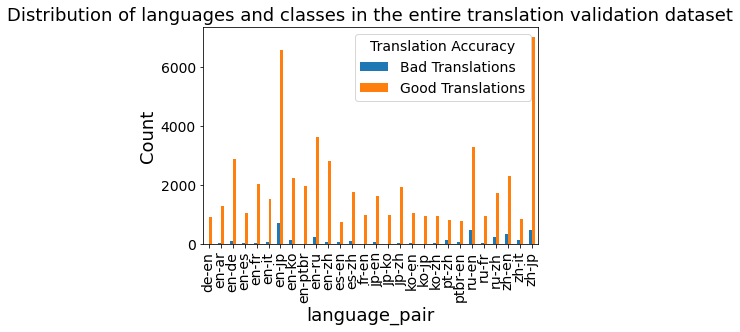

In [10]:
# plot the distribution of languages and classes for the entire dataset
fig = pd.crosstab(dataset_df["language_pair"], dataset_df["accuracy"]).plot.bar()
_ = plt.title("Distribution of languages and classes in the entire translation validation dataset")
_ = plt.ylabel('Count')
_ = plt.legend(["Bad Translations", "Good Translations"], title="Translation Accuracy")

Let's look into the numbers of this distrubution

In [ ]:
# Translation quality (accuracy) of each each jobid')
df_group = dataset_df.groupby(["language_pair", "jobid", "agreement"])
a = pd.DataFrame(df_group.accuracy.value_counts()).rename(columns={"accuracy": "count"})
b = pd.DataFrame(df_group.accuracy.value_counts(normalize=True)).rename(columns={"accuracy": "frequency"})
df_group = pd.concat([a, b], axis=1)
df_group.style.set_caption('Translation quality (accuracy) of each each jobid')

In [12]:
# Let's compute the average statistics on the class imbalance
df_group = df_group.reset_index()
print(f"Average frequency for 'good translations' (accuracy=True) in the job batches: {df_group[df_group.accuracy == True].frequency.mean()*100:.2f}% (+/- {df_group[df_group.accuracy == True].frequency.std()*100:.2f}%)")
print(f"Average frequency for 'bad translations' (accuracy=False) in the job batches:   {df_group[df_group.accuracy == False].frequency.mean()*100:.2f}% (+/- {df_group[df_group.accuracy == False].frequency.std()*100:.2f}%)")

Average frequency for 'good translations' (accuracy=True) in the job batches: 93.87% (+/- 6.59%)
Average frequency for 'bad translations' (accuracy=False) in the job batches:   6.39% (+/- 6.61%)


---
**Considerations:**

* As we can notice, we have a class imbalance problem for our metric of interest (translation accuracy).
* In addition, only a portion of job batches computed rater's agreement, so their results are more 'safe to use'.
* For a fairness comparision of our models performance, we use a held-out balanced testing set that will be explored in the next cells.
---

**Balanced Test set**

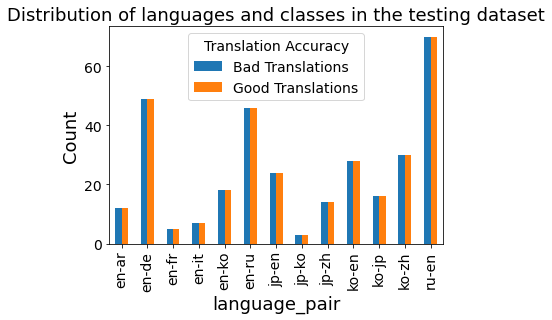

In [13]:
# plot the distribution of languages and classes for the testing dataset
fig = pd.crosstab(test_df["language_pair"], test_df["accuracy"]).plot.bar()
_ = plt.title("Distribution of languages and classes in the testing dataset")
_ = plt.ylabel('Count')
_ = plt.legend(["Bad Translations", "Good Translations"], title="Translation Accuracy")

In [14]:
# Number of examples per language pair
test_df.language_pair.value_counts().rename_axis('Language Pair').to_frame('Count').style.set_caption('Number of examples per language pair')

,Count
Language Pair,
ru-en,140
en-de,98
en-ru,92
ko-zh,60
ko-en,56
jp-en,48
en-ko,36
ko-jp,32
jp-zh,28


---
**Considerations:**

* The first test set contains a balanced distribution of Good and Bad translations (332 of each), but the number of translation pairs per language varies widely.

---

## 3. Quality Estimation Models

This section's goal is to perform preditions using our Quality Estimation models and the benchmark model against the balanced test set.

**We evaluted three different models**:

1. Multilingual Sentence Embedding (to be called here as our "**baseline model**") - a model trained on public translation data
2. Multilingual Sentence Embedding with fine-tuning (to be called here as our "**custom model**") - the baseline model fine-tuned on our data (Transfer Learning)
3. A well-known commercial solution called **ModelFront** - an industrial benchmark

### 3.1. Multilingual Sentence Embeddings

The Multilingual Sentence Embeddings resource can measure the quality in the sentence level:

* **Sentence-level**:
The goal of the Sentence-level Qquality Estimation (QE) task using multilingual sentence embeddings is to predict the quality of the whole translated sentence using the semantic similarity score between two sentences in different languages.

#### 3.1.1. Architecture

**Sentence Transformer - Knowledge Distillation approach**

The architecture consists of two models, the **Teacher** and the **Student**. The Teacher model produces sentence embeddings from source language. Using translated sentences, the Student model needs to mimic the teacher and generate sentence embeddings in the target language. This training will produce an alignment of vector spaces (source and target) making it possible to measure the cosine distance between them.

This models works with transfer learning and needs to be initialize with some pretrained language models as **BERT**, **GPT 2 or 3**, **XLM**, **XLNet**, **RoBERTa** and so on. We follow the [Paper](https://arxiv.org/abs/2004.09813) and kept **SBERT (english model)** initializing the teacher model and **XLM-R (multilingual model with 100 languages)** initializing the student model. 

Some features:

* allows to create multilingual versions from previously monolingual models

* an easy and efficient method to extend existing sentence embedding models to new languages

* the training is based on the idea that a translated sentence should be mapped to the same location in the vector space as the original sentence

<img src='./images/knowledge-distillation.png' width='700'>

#### 3.1.2. Our models

We used the Sentence Transformers [python library](https://github.com/UKPLab/sentence-transformers) provided by the [UKPLab](https://www.informatik.tu-darmstadt.de/ukp/ukp_home/index.en.jsp) with the following pre-trained model:

* **distiluse-base-multilingual-cased-v2**: Multilingual knowledge distilled version of [multilingual Universal Sentence Encoder](https://arxiv.org/abs/1907.04307). 

This multilingual knowledge distilled version supports 50+ languages and more languages can be added by model extension. Supported languages: ar, bg, ca, cs, da, de, el, es, et, fa, fi, fr, fr-ca, gl, gu, he, hi, hr, hu, hy, id, it, ja, ka, ko, ku, lt, lv, mk, mn, mr, ms, my, nb, nl, pl, pt-pt, pt-br, ro, ru, sk, sl, sq, sr, sv, th, tr, uk, ur, vi, zh-cn, zh-tw.

As previouly presented, for this evaluation we have two models based on the Multilingual Sentence Embeddings architecture: 

* **Baseline model**: The Generic model trained on public paralell dataset (distiluse-base-multilingual-cased-v2)
* **Custom model**: The Generic model fine-tuned on DefinedCrowd translations (DC Translation Validation Jobs)

The following picture shows the neural architecure of those models.

<img src='./images/our-models-architecture.png' width='900'>

#### 3.1.3. Predict our model scores

In [15]:
from src.models.predict_model import SentenceTransformerPredict
from src.models import modelfront
from sklearn.preprocessing import minmax_scale

In [16]:
# Our Models
BASELINE_MODEL = "sbert.net_models_distiluse-base-multilingual-cased-v2"
CUSTOM_MODEL = "sbert.net_models_distiluse-base-multilingual-cased-v2-fine-tuned1"

In [17]:
COMPARE_BASELINE_MODEL = True
COMPARE_CUSTOM_MODEL = True

In [18]:
# Do I have my baseline model available?
if COMPARE_BASELINE_MODEL and "baseline" not in test_df:
    
    MODEL_PATH = project_dir / "models" / "all_languages" / BASELINE_MODEL
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the baseline model")

    model = SentenceTransformerPredict(str(MODEL_PATH))
    test_df["baseline"] = test_df.apply(lambda row: model.predict(row.source, row.target), axis=1)
    
    # Apply the normalization function to keep the score in the range [0,1]
    test_df["baseline"] = minmax_scale(test_df["baseline"])

In [19]:
# Do I have my custom model available?
if COMPARE_CUSTOM_MODEL and "custom" not in test_df:
    
    MODEL_PATH = project_dir / "models" / "all_languages" / CUSTOM_MODEL
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the custom model")

    model = SentenceTransformerPredict(str(MODEL_PATH))
    test_df["custom"] = test_df.apply(lambda row: model.predict(row.source, row.target), axis=1)
    
    # Apply the normalization function to keep the score in the range [0,1]
    test_df["custom"] = minmax_scale(test_df["custom"])

### 3.2. ModelFront

ModelFront (https://modelfront.com/) is a technology company that offers scalable solutions for quality estimation. The ModelFront model gives us a translation risk prediction score and is based on deep learning techniques.

#### 3.2.1. Predict ModelFront scores

In [20]:
COMPARE_BENCHMARK_MODEL = True

In [21]:
# Do I have my benchmark model available?
if COMPARE_BENCHMARK_MODEL and "modelfront" not in test_df:

    try:
        # this function requires an API token access. Please check the code on how to provide it.
        test_df["modelfront"] = modelfront.get_translation_risk(df)
    except Exception as e:
        print("Failed to access the API: " + str(e))

In [22]:
# optionally, save pre-processed file
#DATASET_PATH = project_dir / "data" / "processed" / "validation" / "test_balanced.csv"
#test_df.to_csv(DATASET_PATH, index=False)

### 3.3 - Data Analysis

In [23]:
import seaborn as sns

In [24]:
# convert the 'model columns' to different rows in my dataframe
# This new data structure facilitates the next analyses
data = []
for i, row in test_df.iterrows():
    for model in ["baseline", "custom", "modelfront"]:
        if model in test_df:
            data.append(
                {
                    "source": row["source"],
                    "target": row["target"],
                    "language_pair": row["language_pair"],
                    "accuracy": row["accuracy"],
                    "model": model,
                    "score": row[model],
                }
            )
df = pd.DataFrame(data)
df.head(10)

,source,target,language_pair,accuracy,model,score
0,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,baseline,0.89
1,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,custom,0.94
2,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,modelfront,0.80
3,This is my last year 's emoji,Это мой эмоджи за последний год,en-ru,True,baseline,0.72
4,This is my last year 's emoji,Это мой эмоджи за последний год,en-ru,True,custom,0.94
5,This is my last year 's emoji,Это мой эмоджи за последний год,en-ru,True,modelfront,0.70
6,You can relax tomorrow,Завтра вы можете расслабиться,en-ru,True,baseline,0.97
7,You can relax tomorrow,Завтра вы можете расслабиться,en-ru,True,custom,0.96
8,You can relax tomorrow,Завтра вы можете расслабиться,en-ru,True,modelfront,0.58
9,I sometimes have lasagna,Иногда я ем лазанью,en-ru,True,baseline,0.59


Which density distribution do we have on the predicted scores?

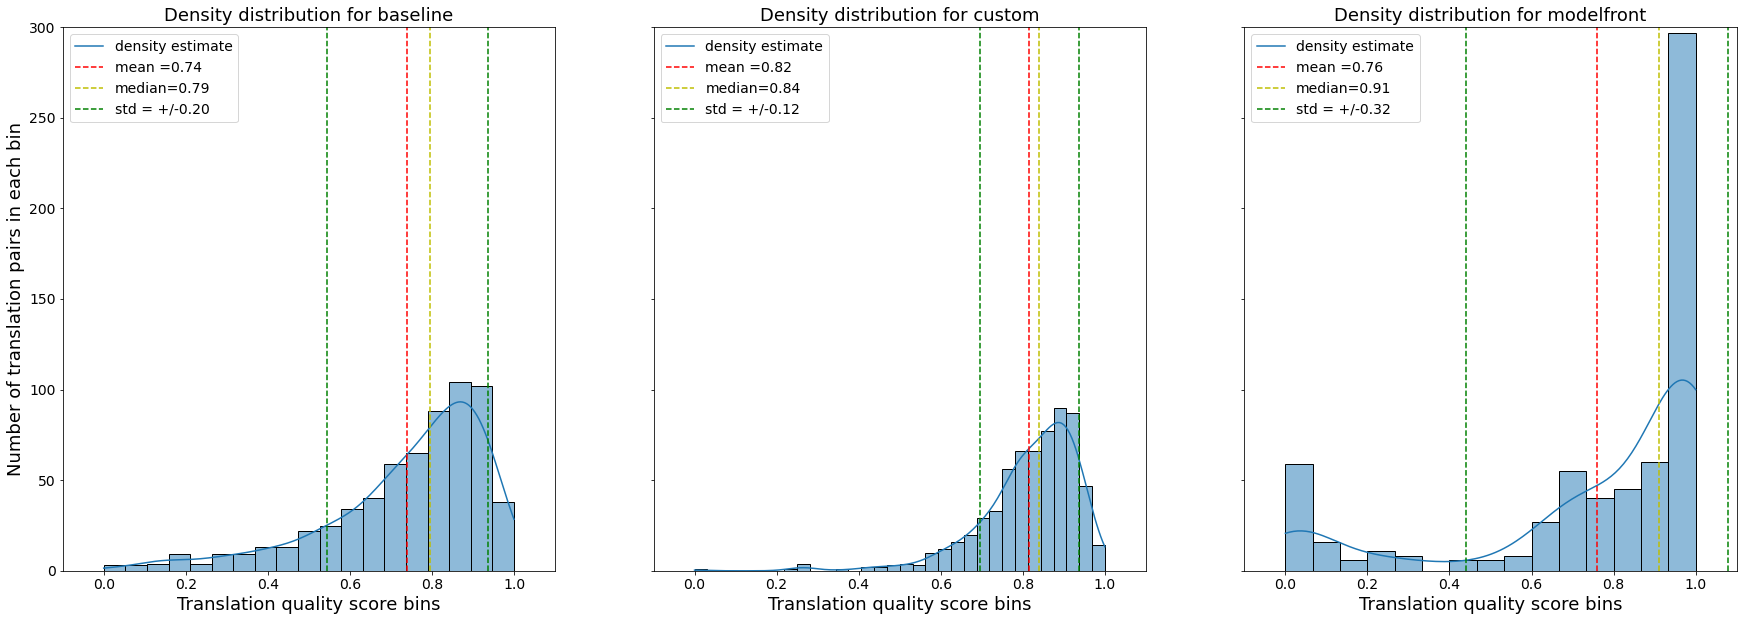

In [25]:
# Plot the density distribution of scores
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot each one of the density functions
for i, model in enumerate(df.model.unique()):
    ax = axes[i]
    sns.histplot(x="score", data=df[df.model == model], ax=ax, kde=True)
    mean = df[df.model == model].score.mean()
    std = df[df.model == model].score.std()
    median = df[df.model == model].score.median()

    ax.set_xlabel("Translation quality score bins")
    ax.set_ylabel("Number of translation pairs in each bin")
    ax.axvline(mean, color="r", linestyle="--")
    ax.axvline(median, color="y", linestyle="--")
    ax.axvline(mean + std, color="g", linestyle="--")
    ax.axvline(mean - std, color="g", linestyle="--")
    ax.legend(
        [
            "density estimate",
            f"mean ={mean:.2f}",
            f"median={median:.2f}",
            f"std = +/-{std:.2f}",
        ]
    )
    
    # put every plot in the same scale
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0, 300])
    ax.label_outer()

    ax.set_title(f"Density distribution for {model}")

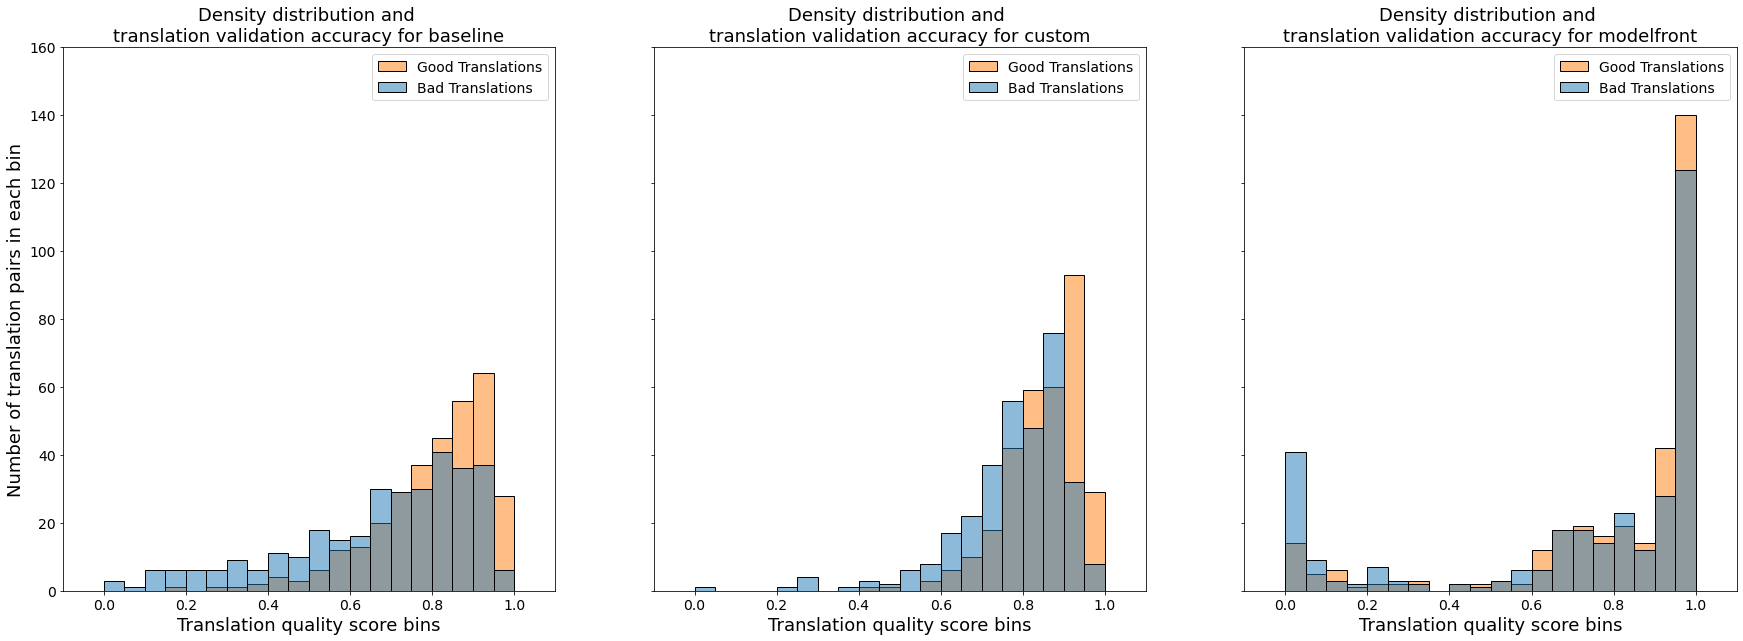

In [26]:
# This chart provides a visualization on the data points, their class and the best threshold obtained.
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot each model
for i, model in enumerate(df.model.unique()):

    ax = axes[i]

    sns.histplot(df[df.model == model], x="score", hue="accuracy", bins=20, ax=ax)

    ax.set(
        xlabel="Translation quality score bins",
        title=f"Density distribution and \ntranslation validation accuracy for {model}",
    )
    ax.set_ylabel("Number of translation pairs in each bin"),
    ax.legend(
        [
            "Good Translations",
            "Bad Translations",
        ]
    )

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0, 160])
    ax.label_outer()

---
**Considerations:**

* Our models density distribution ('baseline' and 'custom') behaves like a gaussian distribution (bell-shaped curve) 
* Our models ('baseline' and 'custom') has the tendency to overestimate the quality (distibution more to the rigth)
* The Modelfront density distribution has two peaks, one close to zero and another close to 1. 
* The Modelfront is 'optimistic' about the translation quality and has a huge density close to 1 (good tanslation).
---

## 4. Evaluation (balanced test set)

In this section, we are going to use different evaluations metrics to report the performance of each model in the balanced test set. The following metrics will be used: 

* **ROC curve**
* **Precision vs recall curve**
* **Classification metrics** (precision, recall, f-score).

---
For the next metrics (ROC, and Precision vs Recall), we are going to consider the `Accuracy = False` ('Bad Translations') as our **class of interest**. To that, we consider that the focus of the models is to correctly identify 'bad translations' from the population and we want to evaluate our model under this capability. 

To report these statistics, it is usual to [use the Positive class as class of interest](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values) (usually the imbalance class or treatment variant). To that, we will invert the accuracy values and scores in order to have the 'bad translations' close to 1 (True) while we keep the 'good translations' close to 0 (False).

---

In [27]:
# Invert the labels and scores to put the class of interest (accuracy=False) as positive
df["accuracy"] = df.accuracy.apply(lambda accuracy: not accuracy)
df["score"] = df.score.apply(lambda score: 1 - score)

### 4.1. ROC Curve

To compare different models, we plot the ROC curve and measure the area under the curve (AUC).

An [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
* TPR = TP / TP + FN

False Positive Rate (FPR) is defined as follows:
* FPR = FP / FP + TN

With the ROC curve, we can measure the **area under the curve (AUC)**. AUC represents the probability that a random positive example (bad translation) is positioned to the right of a random negative (good translation) example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

This section shows the AUC - ROC curve calculations for our models.

In [28]:
import numpy as np
from sklearn.metrics import roc_curve, auc

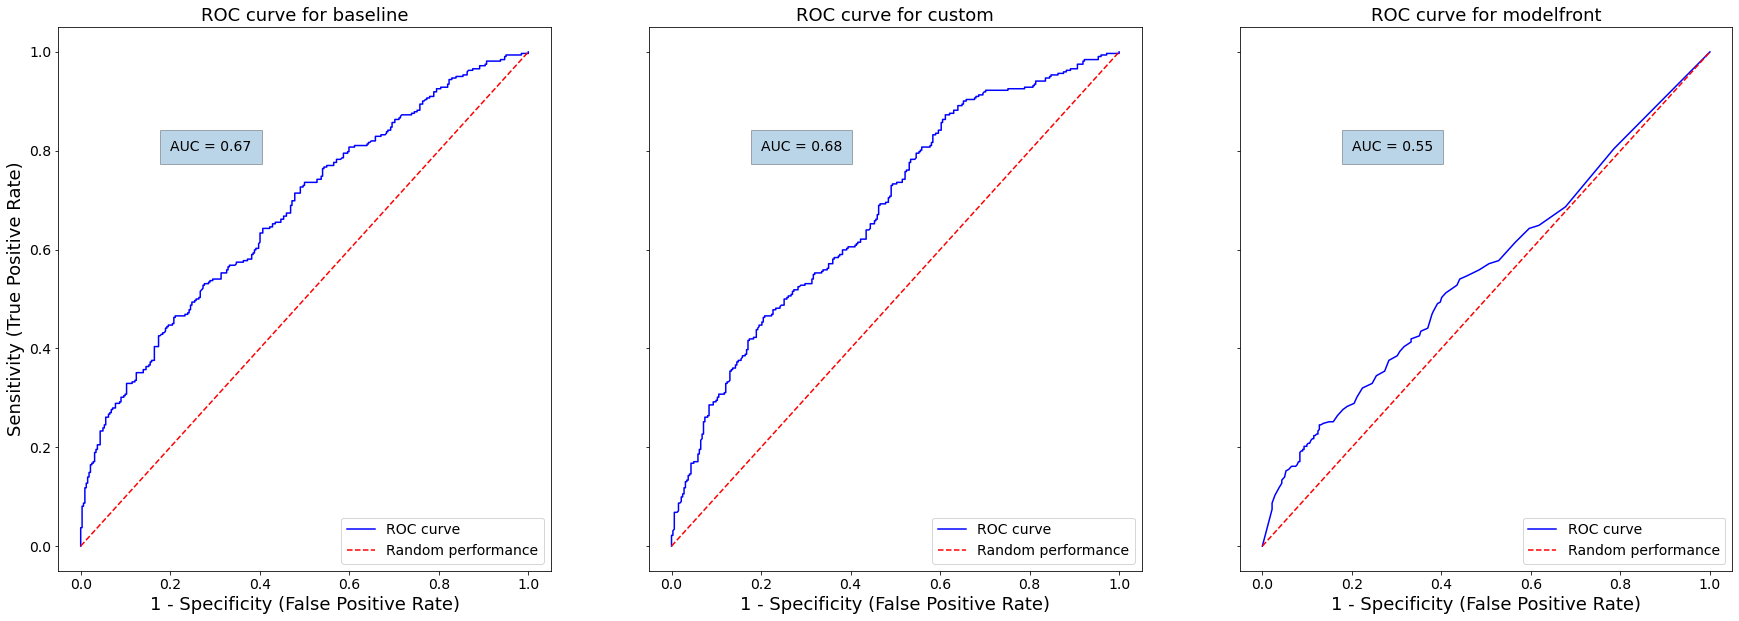

In [29]:
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot the ROC curve for each model being evaluated
for i, model in enumerate(df.model.unique()):
    scores = df[df.model == model]["score"]
    y = np.array(
        [1 if label == True else 0 for label in df[df.model == model]["accuracy"]]
    )

    fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
    auc_score = auc(fpr, tpr)

    ax = axes[i]
    ax.plot(fpr, tpr, "b", label=f"ROC curve", axes=axes[i])
    ax.set_title(f"ROC curve for {model}")
    ax.text(0.2, 0.8, f'AUC = {auc_score:.2f}', bbox={'alpha': 0.3, 'pad': 10})
    ax.plot([0, 1], [0, 1], "r--", label="Random performance")
    ax.legend(loc="lower right")
    ax.set_ylabel("Sensitivity (True Positive Rate)")
    ax.set_xlabel("1 - Specificity (False Positive Rate)")
    ax.label_outer()

---
**Considerations:**

* By inspecting the behaviour for the ROC curve, we can see that the area under the curve (AUC) for our models ('baseline' and 'custom') are higher when compared with ModelFront. This demonstrate that our models have better performance on predicting the translation quality.
* ModelFront ROC curve is close to Random which shows a poor capacity for this model to fit the problem.
* The performance of the 'custom' model is very close to the performance of the 'baseline', indicating that we should provide more data for the training.
* All ROC curves are far from 1 (best score) which shows the complexity of the problem and the the difficulty in predicting the right labels. 
---

### 4.2. Precision vs Recall curve

The [Precision vs Recall curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) compute precision-recall pairs for different probability thresholds. It is usual to compare the models when we have a strong imbalance problems.

Similar to the ROC curve, we can also measure the [**Average Precision (AP)**](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) that summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. The results close to 1 are better.

In [30]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

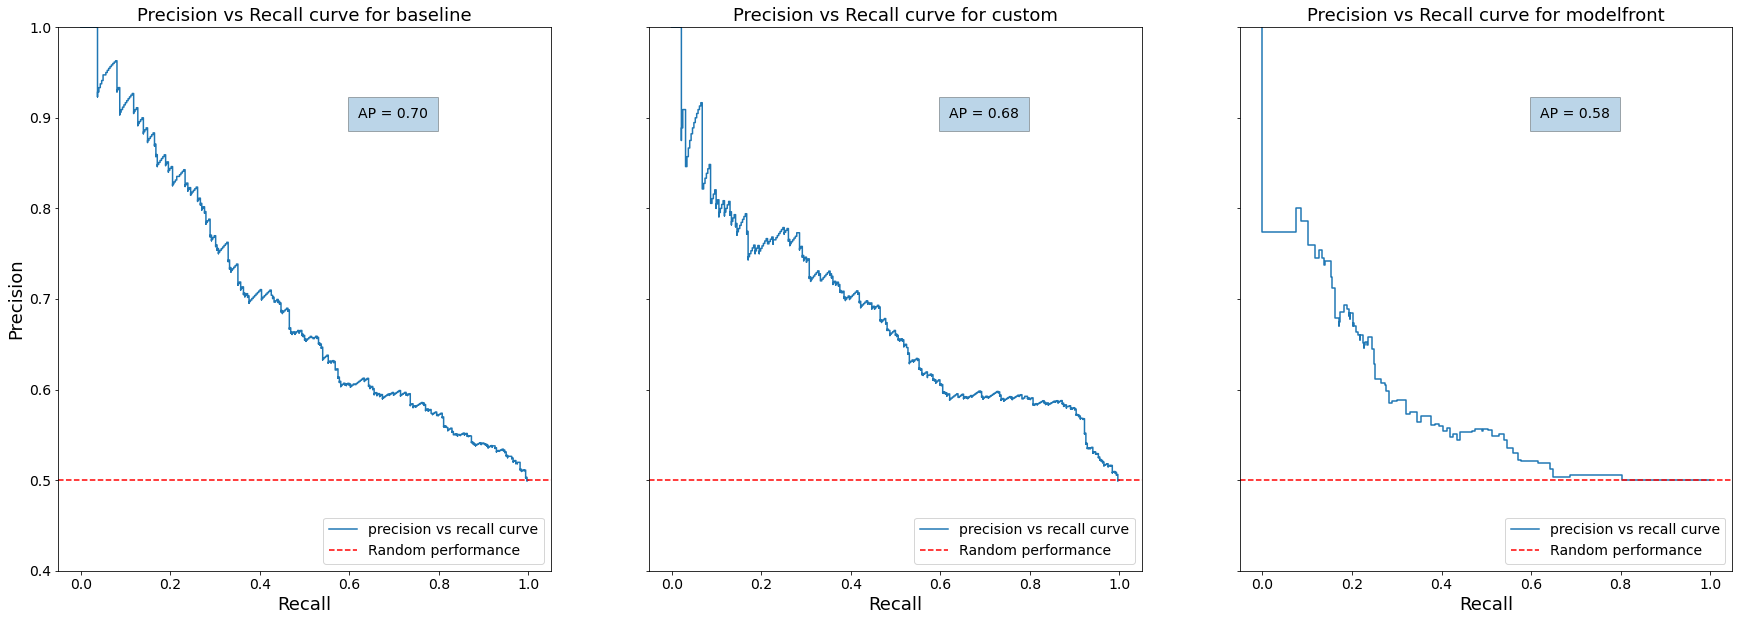

In [31]:
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot the precision vs recall curve for each model being evaluated
for i, model in enumerate(df.model.unique()):
    scores = df[df.model == model]["score"]
    y = np.array(
        [1 if label == True else 0 for label in df[df.model == model]["accuracy"]]
    )
    precision, recall, thresholds = precision_recall_curve(y, scores, pos_label=1)

    # measure the average precision score
    ap_score = average_precision_score(y, scores)
    
    ax = axes[i]
    PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=ax, label=f"precision vs recall curve")

    ax.set_title(f"Precision vs Recall curve for {model}")
    ax.axhline(0.5, ls="--", color="r", label="Random performance")
    ax.text(0.62, 0.9, f'AP = {ap_score:.2f}', bbox={'alpha': 0.3, 'pad': 10})
    ax.legend(loc="lower right")
    
    ax.set_ylim([0.4, 1])
    ax.label_outer()

---
**Considerations:**
* The Precision vs Recall curves shows the difficulty in predicting the right labels by the strong precision vs recall bias the models suffer.
* The best performance was for the 'baseline' model with 0.7 of Average Precision.
---

### 4.3. Binary Classification

In this section, we want to measure the performance of a classification setup. In this way, we want to **predict the accuracy label** in our test set by using the translation quality score provided by each model.

#### 4.3.1. The optimal threshold

To adapt our continous distribution (range [0,1]) to a discrete analysis (0 or 1), it is necessary to provide a cut off point in the distribution to assign the exemples to each class. 

The ROC curve and Precision vs Recall charts showed that our distribution is sensitive to this threshold. In order to make this decision, we need to measure the trade-off between precision and recall and optimize for one of these metrics.

In our evaluation, we discussed that the **'bad translations'** is our class of interest. Considered the nature of the problem, we defined that best optimization criteria is to maximize the difference between the False Positive Rate and True Positive Rate, thus **optimizing for recall**.

In [32]:
# keep the optimal threshold to be used in later analysis
model_thresholds = {}

for i, model in enumerate(df.model.unique()):
    scores = df[df.model == model]["score"]
    y = np.array(
        [1 if label == True else 0 for label in df[df.model == model]["accuracy"]]
    )

    fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

    # we want to find the threshold which maximize the True Negative Rate with less errors as possible (False Negative Rate).
    # In this way, we are looking for the left zone in the chart and focusing on a threshold capable for performing on 'bad translations'
    index = np.argmax(tpr - fpr)
    threshold = thresholds[index]
    
    # as we inverted the classes, we just invert the thesholds as well to map to the real distribution rounded to two decimals.
    threshold = round(1 - threshold,2)
    model_thresholds[model] = threshold
    
pd.DataFrame([{'model': model, 'threshold': threshold} for model, threshold in model_thresholds.items()]).style.set_caption('Best threshold decision for each model')

,model,threshold
0,baseline,0.710000
1,custom,0.900000
2,modelfront,0.590000


In [33]:
# Invert batch the labels and scores to the real distribution
df["accuracy"] = df.accuracy.apply(lambda accuracy: not accuracy)
df["score"] = df.score.apply(lambda score: 1 - score)

**Representing the distribution of translation pair and the optimal threshold**

In the following chart we plot the histograms of the predicted quality scores categorized by the correct class. 

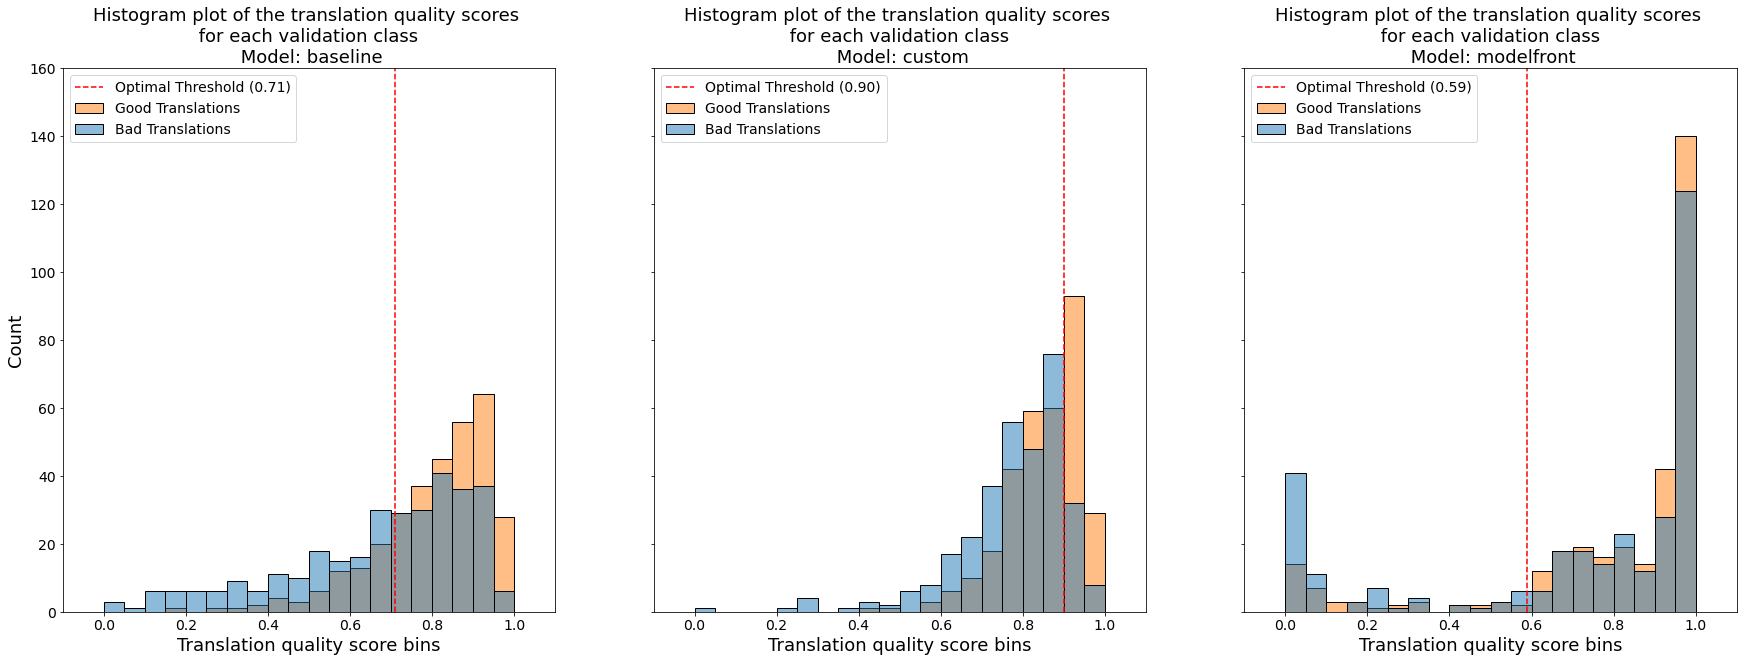

In [34]:
# This chart provides a visualization on the data points, their class and the best threshold obtained.
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot each model
for i, model in enumerate(df.model.unique()):

    ax = axes[i]

    sns.histplot(df[df.model == model], x="score", hue="accuracy", bins=20, ax=ax)

    ax.set(
        xlabel="Translation quality score bins",
        ylabel="Count",
        title=f"Histogram plot of the translation quality scores \n for each validation class \n Model: {model}",
    )
    ax.axvline(
        model_thresholds[model],
        ls="--",
        color="r",
        label=f"cut on {model_thresholds[model]}",
    )
    ax.legend(
        [
            f"Optimal Threshold ({model_thresholds[model]:.2f})",
            "Good Translations",
            "Bad Translations",
        ]
    )

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0, 160])
    ax.label_outer()

---
**Considerations:**
    
* In the plots, we obseve the threshold cut (in red) and the distribution of points to the left (bad translations) and to the rigth (good translations) The colors of each point show the classes distribution.
* In this plot, we can observe that our models ('baseline' and 'custom') are 'more close' to a normal distribution across the 0,1 range of translation quality.
---

#### 4.3.2. Prediction

In [35]:
def binary_classifier(value, threshold):
    if value > threshold:
        return True
    else:
        return False


# compute the precision of each example using the threshold previously computed 
df["prediction"] = df.apply(
    lambda row: binary_classifier(row["score"], model_thresholds[row["model"]]), axis=1
)

In [36]:
df.head()

,source,target,language_pair,accuracy,model,score,prediction
0,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,baseline,0.89,True
1,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,custom,0.94,True
2,Why you like me too much,Почему ты меня слишком любишь?,en-ru,True,modelfront,0.80,True
3,This is my last year 's emoji,Это мой эмоджи за последний год,en-ru,True,baseline,0.72,True
4,This is my last year 's emoji,Это мой эмоджи за последний год,en-ru,True,custom,0.94,True


#### 4.3.3. Confusion Matrix


In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The confusion matrix shows us how the classification occurred in each class and how many are:

* True Positives (model predicted 1 = True = Good translation and it is the right class)
* True Negatives (model predicted 0 = False = Bad translation and it is the right class)
* False Positives (model predicted 1 = True = Good translation and it is the wrong class)
* False Negatives (model predicted 0 = False = Bad translation and it is the wrong class).

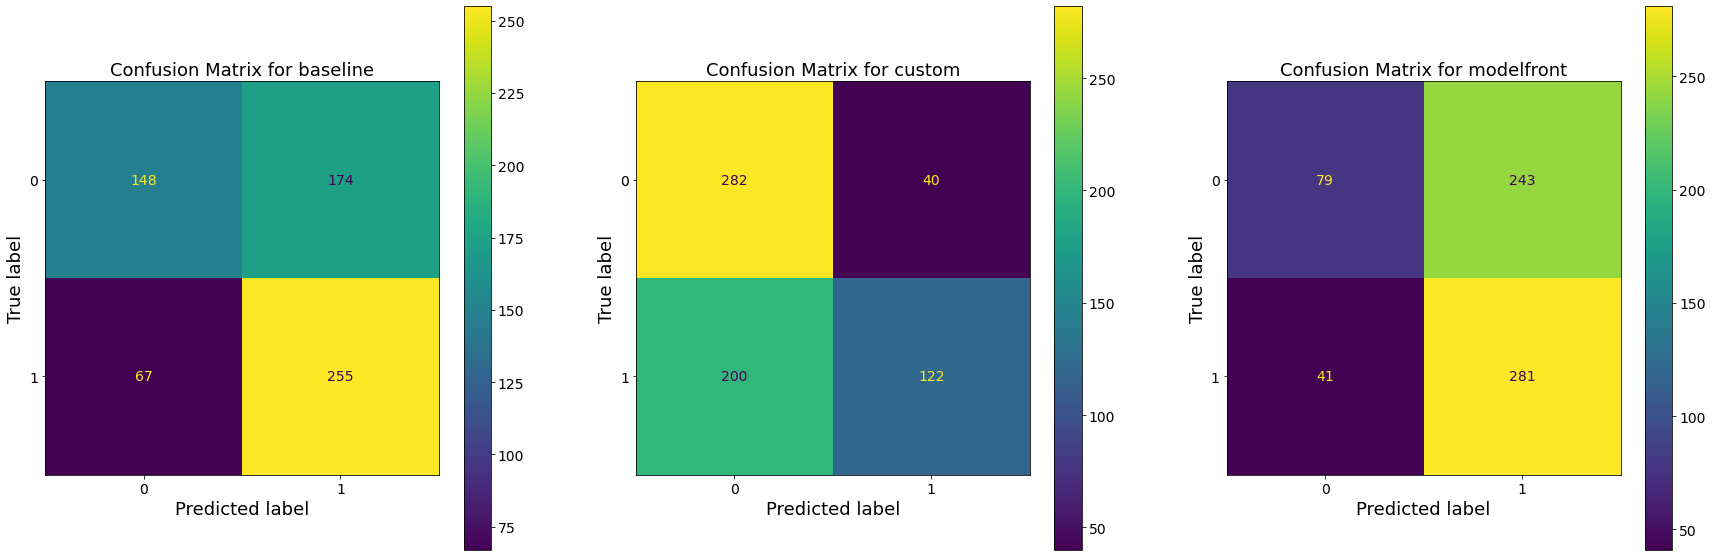

In [38]:
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

# plot for each model
for i, model in enumerate(df.model.unique()):
    ax = axes[i]
    cm = confusion_matrix(df[df.model == model]["accuracy"], df[df.model == model]["prediction"])
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax)
    ax.set_title(f"Confusion Matrix for {model}")

#### 4.3.4. Classification Report

For each one of the classification classes, we can mesure the following classification metrics:

* **precision** - TP / (TP + FP) - the number of correcly classified in this class divided by the total number of elements labelled as belonging to the given class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **recall** - TP / (TP + FN) - the number of correcly classified in this class divided by the total number of elements that actually belong to this class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **f1** - 2*(precion+recall)/(precision+recall) - weighted average of the precision and recall.

In addition, for each classifier, disregarding the class, we can measure the overall accuracy:

* **accuracy** - the number of correctly classified over the number of all translation pairs, i.e, (TP+TN) / (TP+TN+FP+FN)

In [39]:
from sklearn.metrics import classification_report

In [40]:
def classification_metrics(df):
    metrics = classification_report(
        df["accuracy"], df["prediction"], output_dict=True
    )
    return pd.Series(
        [
            metrics["accuracy"],
            str(metrics["False"]["support"]) if "False" in metrics else '0',  # hack to force no decimal notation.
            sum((df["prediction"] == False) & (df["accuracy"] == False)),
            sum((df["prediction"] == False) & (df["accuracy"] == True)),
            metrics["False"]["precision"] if "False" in metrics else None,
            metrics["False"]["recall"] if "False" in metrics else None,
            metrics["False"]["f1-score"] if "False" in metrics else None,
            str(metrics["True"]["support"]) if "True" in metrics else '0',
            sum((df["prediction"] == True) & (df["accuracy"] == True)),
            sum((df["prediction"] == True) & (df["accuracy"] == False)),
            metrics["True"]["precision"] if "True" in metrics else None,
            metrics["True"]["recall"] if "True" in metrics else None,
            metrics["True"]["f1-score"] if "True" in metrics else None,
        ],
        index=[
            [
                "accuracy",
                "Bad Translation",
                "Bad Translation",
                "Bad Translation",
                "Bad Translation",
                "Bad Translation",
                "Bad Translation",
                "Good Translation",
                "Good Translation",
                "Good Translation",
                "Good Translation",
                "Good Translation",
                "Good Translation",
            ],
            [
                "",
                "# class",
                "# correct",
                "# incorrect",
                "Precision",
                "Recall",
                "F1",
                "# class",
                "# correct",
                "# incorrect",
                "Precision",
                "Recall",
                "F1",
            ],
        ],
    )

In [41]:
df.groupby(["model"], as_index=False).apply(classification_metrics)

model accuracy Bad Translation                                         \
                               # class # correct # incorrect Precision Recall   
0    baseline     0.63             322       148          67      0.69   0.46   
1      custom     0.63             322       282         200      0.59   0.88   
2  modelfront     0.56             322        79          41      0.66   0.25   

       Good Translation                                              
    F1          # class # correct # incorrect Precision Recall   F1  
0 0.55              322       255         174      0.59   0.79 0.68  
1 0.70              322       122          40      0.75   0.38 0.50  
2 0.36              322       281         243      0.54   0.87 0.66

---
**Considerations:**

* We observed a better capability in our 'custom' model to balance between precision (0.59) and recall (0.88) which lead to a good avg f1-score (0.70) for the 'bad translation' class.
* The 'custom' model has a high Recall in the 'bad translation' class (threshold optimized for Recall)
* The 'custom' model has low Recall and high Precision in the 'good translation' class (Precision-Recall trade-off)
* We observe the ModelFront tendency to everestimate the translation quality. As it includes most of the examples as good translation, it fails more on predicting the bad translations (low recall - 0.25 and high error rate for good translations - # incorrect)
---

### 4.4. Confidence Levels

In this section, we want to answer if it is possible to provide a confidence level in the interpretation of the results. In other words,

* **Can I define an uncertanty interval which I am bad on predicting the translation quality?**  

There are many ways to measure the confidence level of a distribution. In this work, we split our distribution into several bins and measure the error of our testing dataset into those bins. The metrics used to mesure the error is the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE).

The analysis and confidence scores are impacted by the choice of two parameters:

* **Bin size** - Size of the window I am considering for group data into the same "bin". This parameter impacts how the MSE is measured (per bin)
* **MSE confidence threshold** - Percentage of Mean Squared Error in my data that I want to assume for as high, medium and low confidence.

For the confidence threshold, we used the following values which has been shown to be adequate for this task

* high confidence levels: 1-MSE larger or equal to 99%;
* medium confidence levels: 1-MSE in the ]99%-70%] range;
* low: 1-MSE lower than 70%.

**Parameters:**

In [42]:
# What is the size of the window am I looking.
# For 0.1, I will be analysing 10 bins with 0.1 score range for a [0,1] distribution.
BIN_SIZE = 0.1

HIGH_CONFIDENCE_THRESHOLD = 0.99
MEDIUM_CONFIDENCE_THRESHOLD = 0.7

**Measuring the MSE error in the distribution**

In [43]:
from sklearn.metrics import mean_squared_error

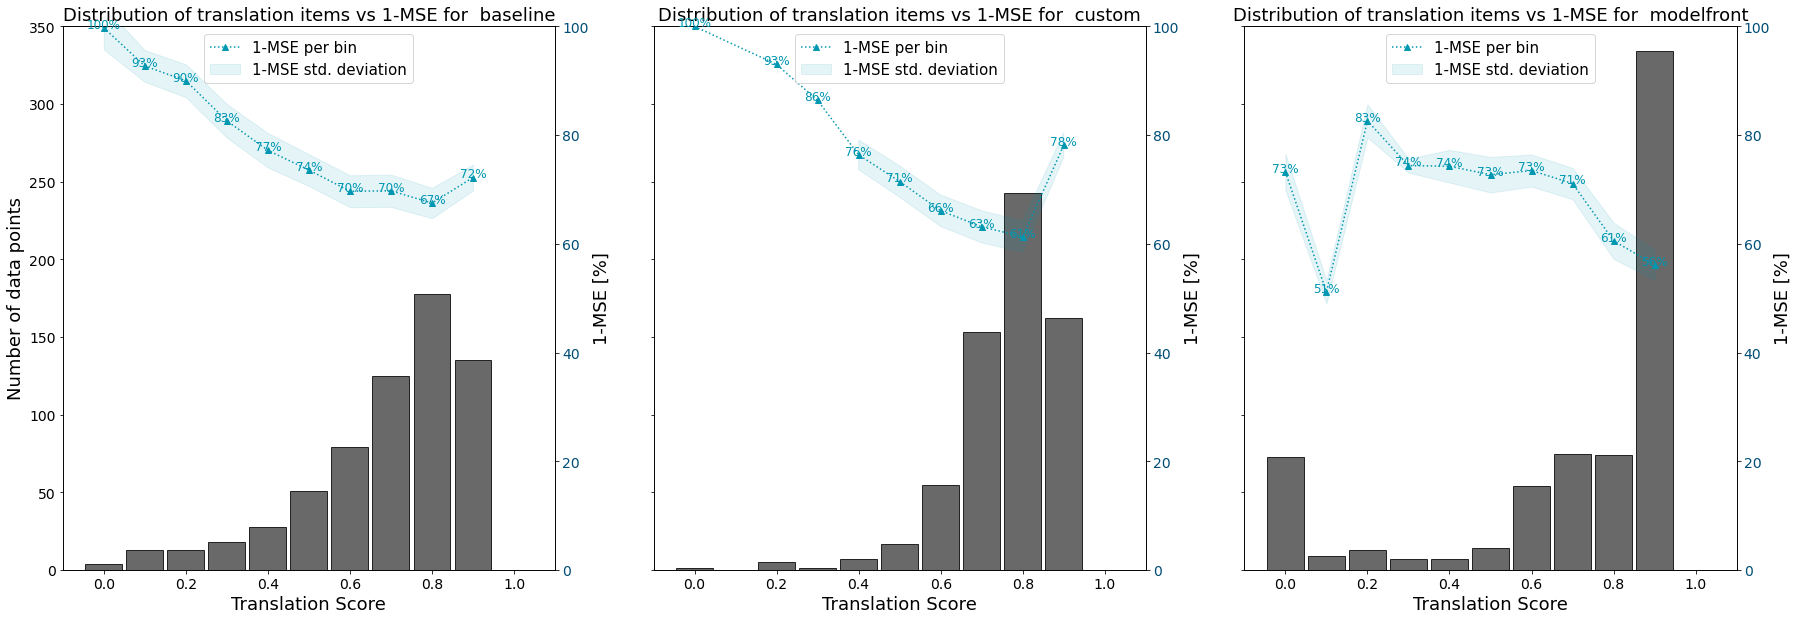

In [44]:
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

for i, model in enumerate(df.model.unique()):
    ax = axes[i]

    # keeps the data for each bin the histogram
    hist_x = []
    hist_y = []
    hist_mse = []
    hist_std = []

    # iterate over the bin intervals
    for x in np.arange(0, 1, BIN_SIZE):

        # select the data for the bin [x,x+BIN_SIZE]
        bin_df = df[(df.model == model) & (df.score >= x) & (df.score <= x + BIN_SIZE)]

        if bin_df.empty:
            continue

        hist_x.append(x)
        hist_y.append(len(bin_df))

        # Measures the MSE
        mse = (1 - mean_squared_error(bin_df.score, bin_df.accuracy)) * 100
        hist_mse.append(mse)

        std = bin_df.score.std() * 100
        hist_std.append(std)

    ax.bar(
        hist_x,
        hist_y,
        color="#444444",
        edgecolor="black",
        alpha=0.8,
        width=BIN_SIZE * 0.9,
    )

    ax_right = ax.twinx()

    ax_right.plot(
        hist_x,
        hist_mse,
        marker="^",
        ls="dotted",
        c="#0097b1",
        label="1-MSE per bin",
    )

    for i, value in enumerate(hist_x):
        ax_right.text(
            value,
            hist_mse[i],
            "{:>2.0f}%".format(hist_mse[i]),
            color="#0097b1",
            size=12,
            horizontalalignment="center",
        )

    # add the std to the plot
    ax_right.fill_between(
        hist_x,
        np.add(hist_mse, hist_std),
        np.subtract(hist_mse, hist_std),
        color="#0097b1",
        alpha=0.1,
        label="1-MSE std. deviation",
    )

    ax_right.tick_params(axis="y", labelcolor="#004d75")
    ax_right.set_ylim(0, 100)
    ax_right.set_xlim(0, 1)
    ax_right.grid(False)
    ax.grid(False, axis="y")
    ax.set_ylabel("Number of data points")
    ax_right.set_ylabel("1-MSE [%]")
    ax.set_xlabel("Translation Score\n")
    ax.set_title(f"Distribution of translation items vs 1-MSE for  {model}")
    ax.tick_params(axis="both", which="minor")
    ax.tick_params(axis="both", which="major")
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0, 350])
    ax.label_outer()

    ax_right.legend(loc=9, fontsize=15)

---
**Analysis**:
    
* The chart shows the 1-MSE scores for each bin across the Translation score values. 
* We observed that our models ('baseline' and 'custom') are able to perform better (higher 1-MSE) in the bins close to 0 (bad translations).
* The Modelfront model has a skewed distribution of MSE scores among the bins.
* The bins with more error in our models ('baseline' and 'custom') are around the score 0.8, so we can say that the model is less confident on predicting the translation accuracy for this region.
---

**Using the 1-MSE to determine the confidence levels**

Here, we want to use the 1-MSE scores per bin to set the confidence intervals for my translation score range. 

As we noticed in the previous cells, the error measured in some bins are higher than others, which lead us to infer that the model is less confident on the predictions in those ranges. We will use the manually defined confidence thresholds to tag these levels.

In [45]:
for i, model in enumerate(df.model.unique()):
    for x in np.arange(0, 1, BIN_SIZE):

        # select the data for the bin [x,x+BIN_SIZE]
        bin_df = df[(df.model == model) & (df.score >= x) & (df.score <= x + BIN_SIZE)]

        if bin_df.empty:
            continue

        mse = 1 - mean_squared_error(bin_df.score, bin_df.accuracy, squared=True)

        # use the thresholds pre-determined to tag the confidence levels
        if mse >= HIGH_CONFIDENCE_THRESHOLD:
            df.loc[bin_df.index, "confidence"] = "high"
        elif mse >= MEDIUM_CONFIDENCE_THRESHOLD:
            df.loc[bin_df.index, "confidence"] = "medium"
        else:
            df.loc[bin_df.index, "confidence"] = "low"

In [46]:
df.sample(10)

,source,target,language_pair,accuracy,model,score,prediction,confidence
1224,"Правда, без подставки с расположенными под прямым углом к столу 9-дюймовыми экранами работать вряд ли будет удобно.",Although it will be hardly comfortable to work without a stand with 9” screens put at a right angle to the desk.,ru-en,False,baseline,0.83,True,low
265,Did not understood ?-mark,Извините?,en-ru,False,custom,0.53,False,medium
606,살때 일주일에,when you lived there we,ko-en,False,baseline,0.27,False,medium
1459,마음 아프다,心が痛い。,ko-jp,True,custom,0.98,True,medium
307,Didn't wake me up I was already awake I'm just laying in my bed I want,لم توقظني، كنت قد استيقظت، أنا ممدّد في سريري، أريد,en-ar,True,custom,0.85,False,low
1820,And we've been sneaking off every weekday since,Und wir haben uns seitdem jeden Wochentag davon gestohlen,en-de,False,modelfront,0.95,True,low
401,Abdominal binder for after you have a C-section to help with the healing process,제왕절개를 한 후 복대를 하는 것은 치유 과정을 도와줍니다,en-ko,True,modelfront,0.91,True,low
249,I am going for breakfast now my love and then I will come back,"Сейчас я иду завтракать, любовь моя, а потом я вернусь",en-ru,True,baseline,0.94,True,medium
373,Yes I'm fine,"예, 저는 괜찮습니다",en-ko,True,custom,0.90,False,low
845,장난이야,开玩笑的,ko-zh,True,modelfront,0.98,True,low


In [47]:
# Do I have any missing field?
df[df.confidence.isna()]

,source,target,language_pair,accuracy,model,score,prediction,confidence


In [48]:
# remove this odd case.
df = df[~df.confidence.isna()]

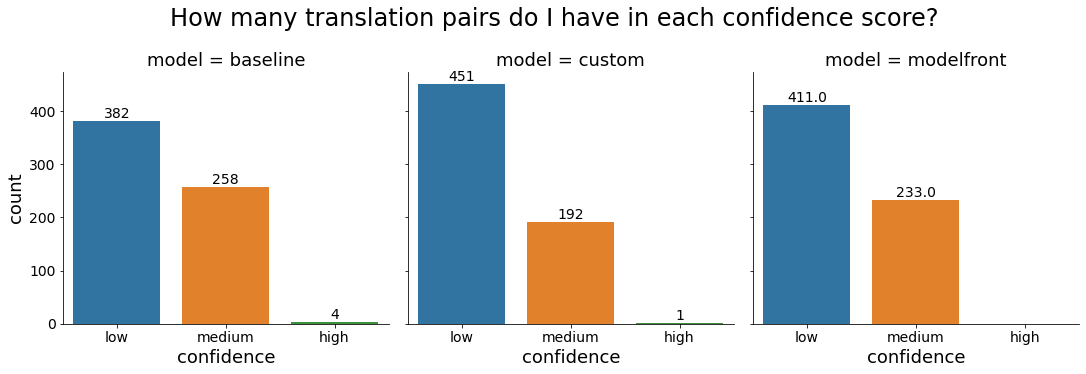

In [49]:
# How many items do I have in each confidence score?
g = sns.catplot(x="confidence", col="model", data=df, kind="count")
for ax in g.axes[0]:
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate(p.get_height(), (x.mean(), y), ha="center", va="bottom")
plt.subplots_adjust(top=0.8)
_ = g.fig.suptitle("How many translation pairs do I have in each confidence score?")

---
**Considerations:**

* We observed a clear region of low perfomance for our models ('baseline' and 'custom') around the score 0.8. Because of that, this region is also identified as low confidence in the analysis.
* We also observe a high confidence on the examples close to 0 as they were all correctly predicted as 'bad translations'. 
* We observe that our models ('baseline' and 'custom') are better on distinguishing bad translations that it are on distinguishing good translations.
* All models have a high 'low confidence' rate
---

**Classification results per the confidence levels**

In this section, we want to see the impact of each confidence level region in the binary classification results reported in the Section 4.4. To that, we want to explore some considerations on the quality of our classification within these regions.

In [50]:
df.groupby(["model", "confidence"], as_index=False).apply(classification_metrics)

/home/jessica/projects/code_review/NLP.MachineTranslation.QualityEstimationAPI/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/projects/code_review/NLP.MachineTranslation.QualityEstimationAPI/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/projects/code_review/NLP.MachineTranslation.QualityEstimationAPI/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

model confidence accuracy Bad Translation                        \
                                          # class # correct # incorrect   
0    baseline       high     1.00               4         4           0   
1    baseline        low     0.56             182        51          37   
2    baseline     medium     0.72             136        93          30   
3      custom       high     1.00               1         1           0   
4      custom        low     0.57             256       256         195   
5      custom     medium     0.77              65        25           5   
6  modelfront        low     0.53             190         3           6   
7  modelfront     medium     0.61             132        76          35   

                        Good Translation                                  \
  Precision Recall   F1          # class # correct # incorrect Precision   
0      1.00   1.00 1.00                0         0           0       NaN   
1      0.58   0.28 0.38              200       163         131      0.55   
2      0.76   0.68 0.72              122        92          43      0.68   
3      1.00   1.00 1.00                0         0           0       NaN   
4      0.57   1.00 0.72              195         0           0      0.00   
5      0.83   0.38 0.53              127       122          40      0.75   
6      0.33   0.02 0.03              221       215         187      0.53   
7      0.68   0.58 0.63              101        66          56      0.54   

               
  Recall   F1  
0    NaN  NaN  
1   0.81 0.66  
2   0.75 0.72  
3    NaN  NaN  
4   0.00 0.00  
5   0.96 0.84  
6   0.97 0.69  
7   0.65 0.59

---
**Considerations:**

* By removing the 'low confidence' scores, we improve our Prediction, Recall, and F1 metrics as we are only using the examples closer to the both ends of the distribution.
* However, by doing this removal, we are also removing a significant percentage of the data (between 40% and 60%)
* It is on our understanding that the confidence levels can help to trust more or less on a prediction, but they should not be used to filter out examples.
---

## 5. Evaluation on previous batches (unbalanced test set)

In this section, we are going to analyse the evaluation results for previous job batches. We want to understand the behaviour and performance of our metrics on real unbalanced data and among different language pairs.

### 5.1. Selecting a subset of examples for this analysis

The goal is to select some of the language pairs for a deeper analysis. Our choice was:

* 'jp-zh': because 'zh-jp' is one of the languages for the Apple Pilot running on Dec/2020
* 'en-jp': because it is one of the languages for the Apple Pilot running on Dec/2020
* 'en-de': a language pair in the same language family (Proto-Germanic)
* 'ru-en': a language pair between two different language families

In [51]:
DATASET_PATH = project_dir / "data" / "processed" / "validation" / "test_unbalanced.csv"

In [52]:
USE_SAVED_DATA = True

In [53]:
# This sample was already pre-processed. We will use the stored values.
if USE_SAVED_DATA:
    df = pd.read_csv(DATASET_PATH)

In [54]:
# Let's check again the job ids that are part in this selection
df_group = df.groupby(
    ["language_pair", "jobid", "agreement"],
)
a = pd.DataFrame(df_group.accuracy.value_counts()).rename(columns={"accuracy": "count"})
b = pd.DataFrame(df_group.accuracy.value_counts(normalize=True)).rename(
    columns={"accuracy": "frequency"}
)
df_group = pd.concat([a, b], axis=1)
df_group.style.set_caption('Translation quality (accuracy) of each each jobid')

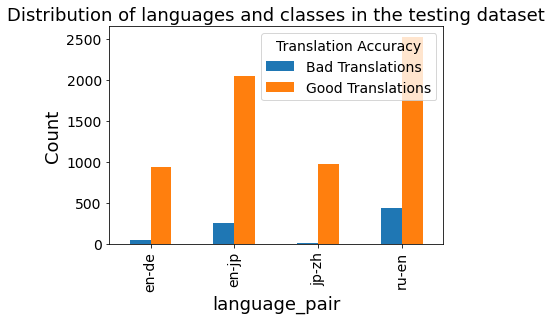

In [55]:
# plot the distribution of languages and classes for the testing dataset
fig = pd.crosstab(df["language_pair"], df["accuracy"]).plot.bar()
_ = plt.title("Distribution of languages and classes in the testing dataset")
_ = plt.ylabel('Count')
_ = plt.legend(["Bad Translations", "Good Translations"], title="Translation Accuracy")

### 5.2. Quality Estimation Models

**Predict the score for each model**

In [56]:
COMPARE_BASELINE_MODEL = True
COMPARE_CUSTOM_MODEL = True
COMPARE_BENCHMARK_MODEL = True

In [57]:
# Our Models
BASELINE_MODEL = "sbert.net_models_distiluse-base-multilingual-cased-v2"
CUSTOM_MODEL = "sbert.net_models_distiluse-base-multilingual-cased-v2-fine-tuned2"

In [58]:
# Do I have my baseline model available?
if COMPARE_BASELINE_MODEL and "baseline" not in df:
    
    MODEL_PATH = project_dir / "models" / "all_languages" / BASELINE_MODEL
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the baseline model")

    model = SentenceTransformerPredict(str(MODEL_PATH))
    df["baseline"] = df.apply(lambda row: model.predict(row.source, row.target), axis=1)
    
    # Apply the normalization function to keep the score in the range [0,1]
    df["baseline"] = minmax_scale(df["baseline"])

In [59]:
# Do I have my custom model available?
if COMPARE_CUSTOM_MODEL and "custom" not in df:
    
    MODEL_PATH = project_dir / "models" / "all_languages" / CUSTOM_MODEL
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the custom model")

    model = SentenceTransformerPredict(str(MODEL_PATH))
    df["custom"] = df.apply(lambda row: model.predict(row.source, row.target), axis=1)
    
    # Apply the normalization function to keep the score in the range [0,1]
    df["custom"] = minmax_scale(df["custom"])

In [60]:
# Do I have my benchmark model available?
if COMPARE_BENCHMARK_MODEL and "modelfront" not in df:
    try:
        # this function requires an API token access. Please check the code on how to provide it.
        df["modelfront"] = modelfront.get_translation_risk(df)
    except Exception as e:
        print("Failed to access the API: " + str(e))

In [61]:
# optionally, save pre-processed file
#DATASET_PATH = project_dir / "data" / "processed" / "validation" / "test_unbalanced.csv"
#df.to_csv(DATASET_PATH, index=False)

In [62]:
# convert the 'model columns' to different rows in my dataframe
data = []
for i, row in df.iterrows():
    for model in ["baseline", "custom", "modelfront"]:
        if model in df:
            data.append(
                {
                    "source": row["source"],
                    "target": row["target"],
                    "language_pair": row["language_pair"],
                    "jobid": row["jobid"],
                    "agreement": row["agreement"],
                    "accuracy": row["accuracy"],
                    "model": model,
                    "score": row[model],
                }
            )
df = pd.DataFrame(data)

# General check on the data
df.head(10)

,source,target,language_pair,jobid,agreement,accuracy,model,score
0,All lined up eat me in the warehouse,倉庫内ですべての準備が整いました,en-jp,5526,True,False,baseline,0.61
1,All lined up eat me in the warehouse,倉庫内ですべての準備が整いました,en-jp,5526,True,False,custom,0.68
2,All lined up eat me in the warehouse,倉庫内ですべての準備が整いました,en-jp,5526,True,False,modelfront,0.96
3,I am at the airport at the moment I am picking somebody up in the next 10 minutes if I don't call you back I am driving back the customer to Epping,私は今空港です。あと10分で人を迎えるのでもし電話を私が返さなかったら、お客様をエッピングに車で送っているところです,en-jp,5526,True,False,baseline,0.83
4,I am at the airport at the moment I am picking somebody up in the next 10 minutes if I don't call you back I am driving back the customer to Epping,私は今空港です。あと10分で人を迎えるのでもし電話を私が返さなかったら、お客様をエッピングに車で送っているところです,en-jp,5526,True,False,custom,0.85
5,I am at the airport at the moment I am picking somebody up in the next 10 minutes if I don't call you back I am driving back the customer to Epping,私は今空港です。あと10分で人を迎えるのでもし電話を私が返さなかったら、お客様をエッピングに車で送っているところです,en-jp,5526,True,False,modelfront,1.00
6,Don't eat anything from midnight and only have sips of water after 6 AM,真夜中は何も食べず、午前6時以降は水を少しだけ飲んでき,en-jp,5526,True,True,baseline,0.76
7,Don't eat anything from midnight and only have sips of water after 6 AM,真夜中は何も食べず、午前6時以降は水を少しだけ飲んでき,en-jp,5526,True,True,custom,0.90
8,Don't eat anything from midnight and only have sips of water after 6 AM,真夜中は何も食べず、午前6時以降は水を少しだけ飲んでき,en-jp,5526,True,True,modelfront,1.00
9,Follow the orange guy,オレンジの男をフォローしてください,en-jp,5526,True,True,baseline,0.76


### 5.3. Data Analysis

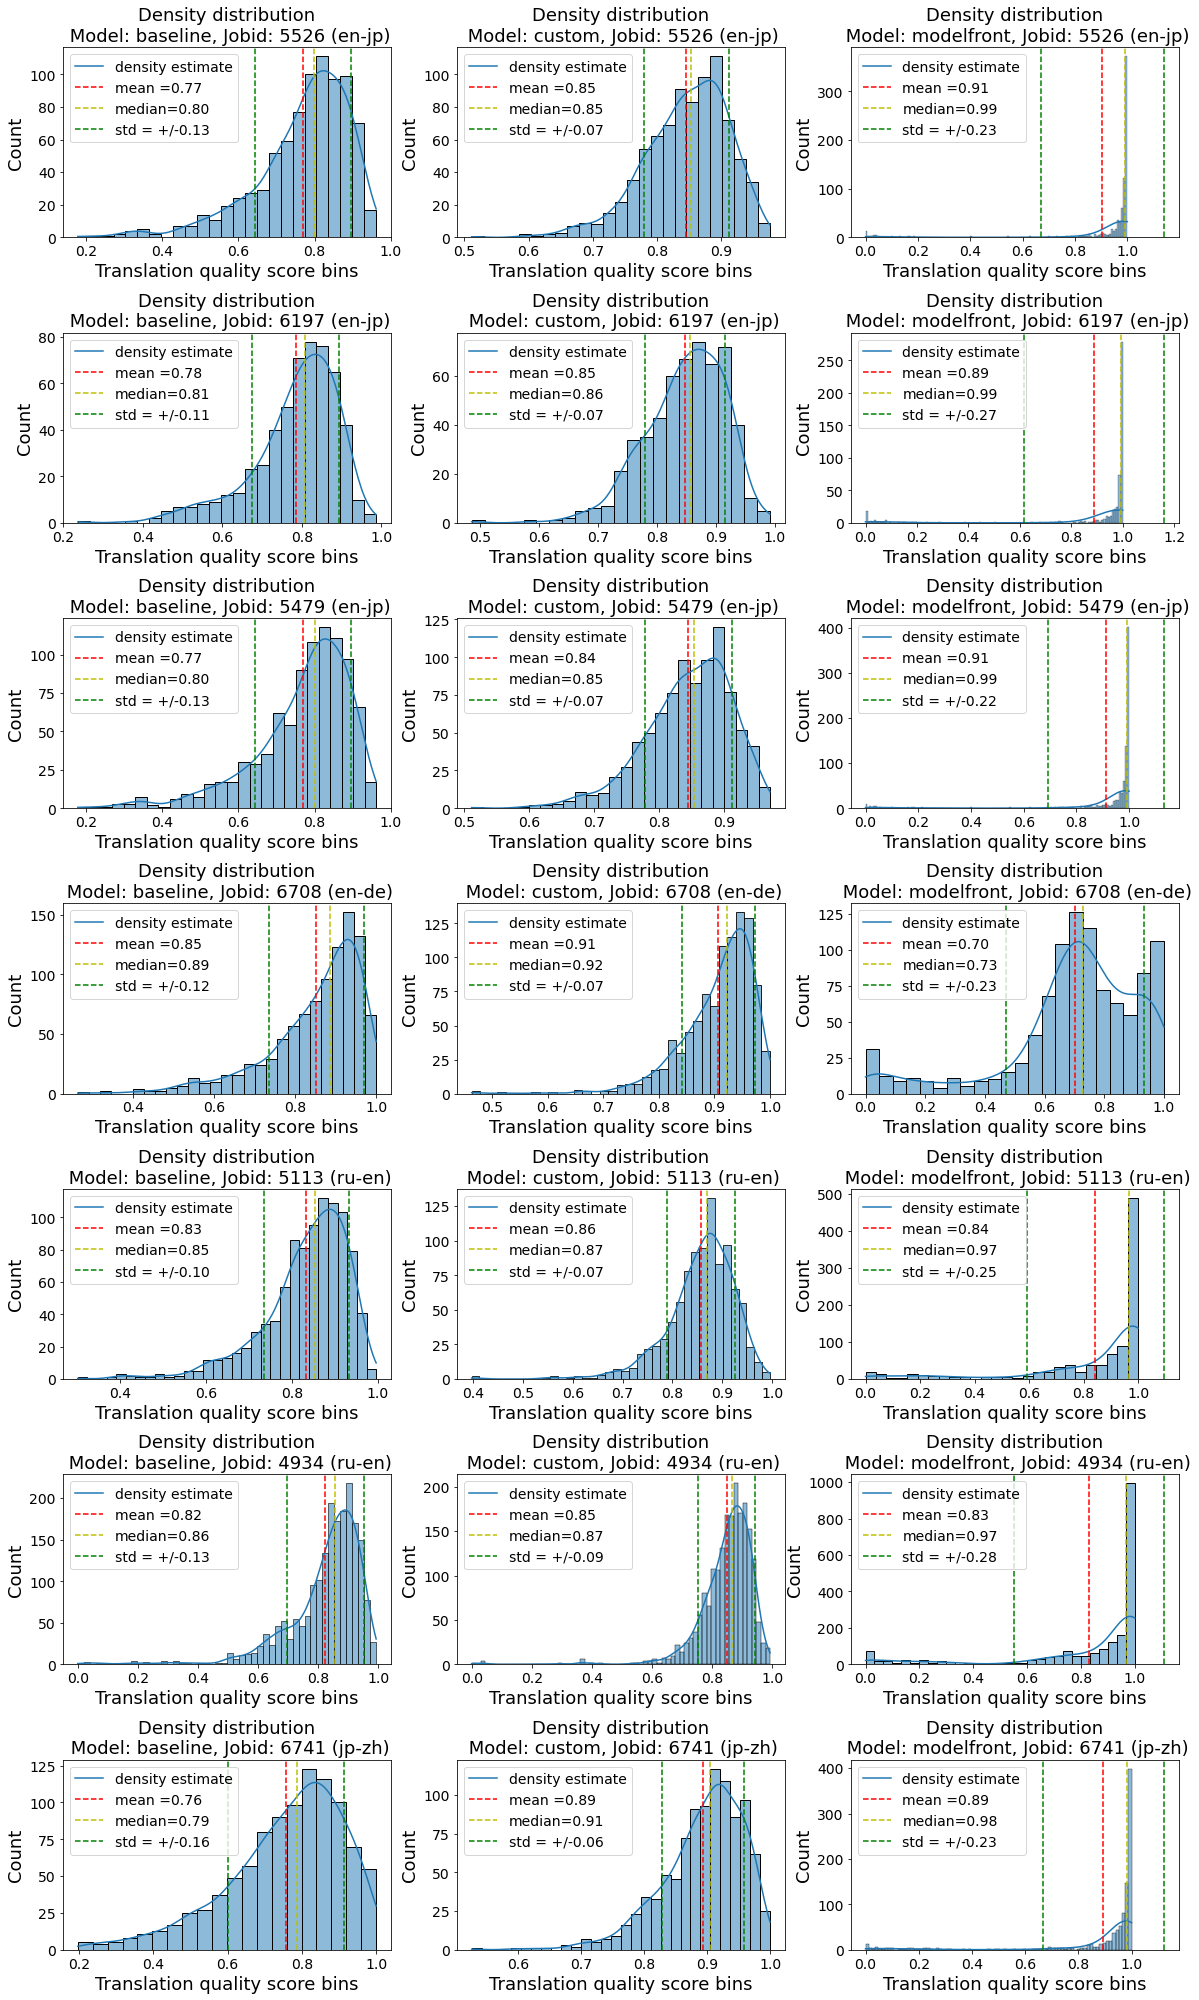

In [63]:
# Configure the number of subplots required to plot the density distribution of scores for each model and jobid
fig, axes = plt.subplots(
    ncols=len(df.model.unique()), nrows=len(df.jobid.unique()), figsize=(20, 35)
)
fig.subplots_adjust(hspace=0.5)

# plot each one of the density functions
for i, model in enumerate(df.model.unique()):
    for j, jobid in enumerate(df.jobid.unique()):
        # only one model hack
        # ax = axes[j]
        ax = axes[j][i]
        language_pair = df[(df.model == model) & (df.jobid == jobid)][
            "language_pair"
        ].values[0]
        sns.histplot(
            x="score",
            data=df[(df.model == model) & (df.jobid == jobid)],
            ax=ax,
            kde=True,
        )
        ax.set_title(
            f"Density distribution\n Model: {model}, Jobid: {jobid} ({language_pair})"
        )
        mean = df[(df.model == model) & (df.jobid == jobid)].score.mean()
        std = df[(df.model == model) & (df.jobid == jobid)].score.std()
        median = df[(df.model == model) & (df.jobid == jobid)].score.median()

        ax.set_xlabel("Translation quality score bins")
        ax.set_ylabel("Count")
        ax.axvline(mean, color="r", linestyle="--")
        ax.axvline(median, color="y", linestyle="--")
        ax.axvline(mean + std, color="g", linestyle="--")
        ax.axvline(mean - std, color="g", linestyle="--")
        ax.legend(
            [
                "density estimate",
                f"mean ={mean:.2f}",
                f"median={median:.2f}",
                f"std = +/-{std:.2f}",
            ]
        )

---
**Considerations:**

* The density functions of each model are similar among different job batches and languages.
* For ModelFront, the exeption is the 'en-de' language pair which shows a distribution curve similar to a bell-shaped one.
---

### 5.4. Evaluation

For the following analysis, we are going to exclude the jobid 6197 ('en-jp') as it only contain 'good translations' and many of our analysis require counting the % of 'bad translations'.

In [64]:
# removing the jobid which only contains 'good tanslations'
df = df[df.jobid != 6197]

#### 5.4.1. ROC Curve

In [65]:
# Invert the labels and scores to put the interest classe (accuracy=False) as positive
df["accuracy"] = df.accuracy.apply(lambda accuracy: not accuracy)
df["score"] = df.score.apply(lambda score: 1 - score)

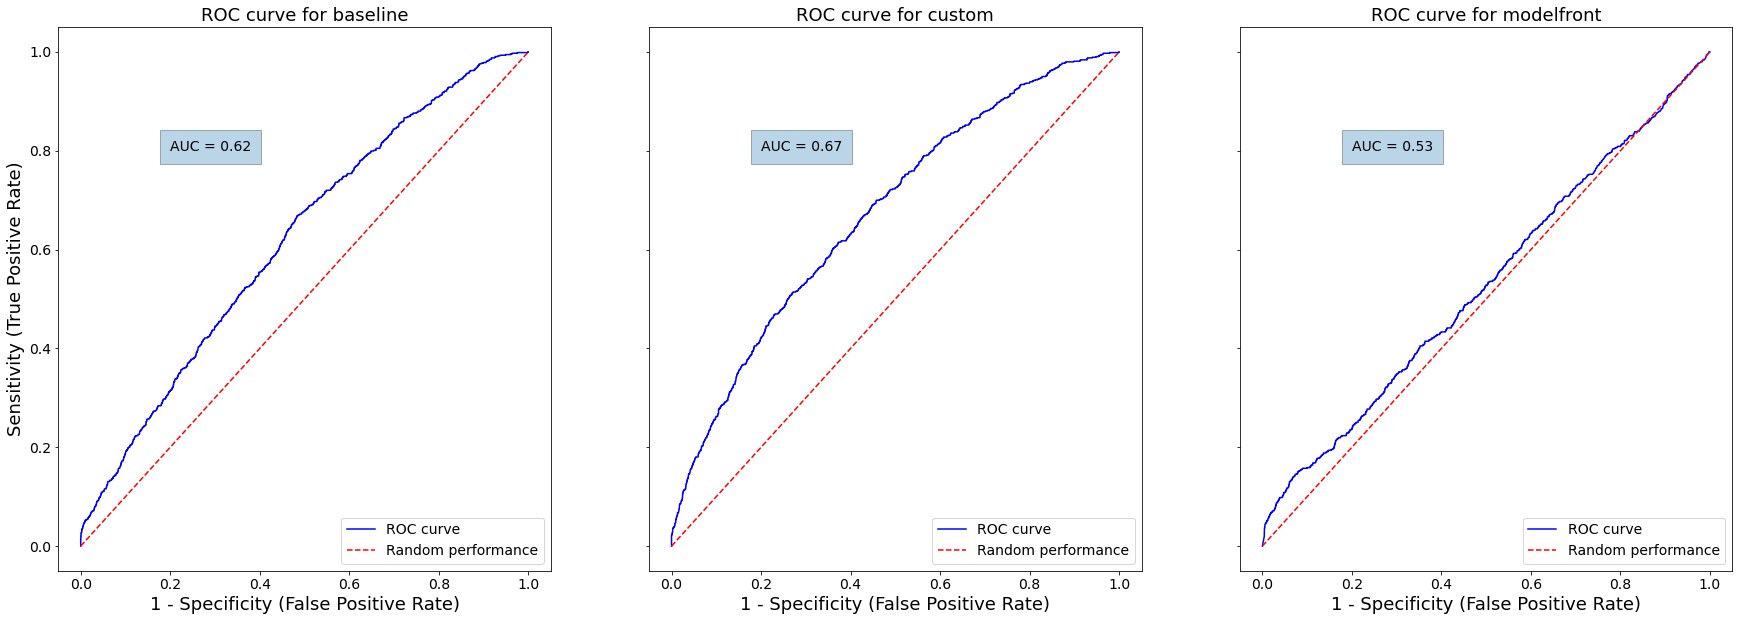

In [66]:
# Plot the ROC curve for each model being evaluated
fig, axes = plt.subplots(ncols=len(df.model.unique()), nrows=1, figsize=(30, 10))

for i, model in enumerate(df.model.unique()):
    scores = df[df.model == model]["score"]
    y = np.array(
        [1 if label == True else 0 for label in df[df.model == model]["accuracy"]]
    )

    fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
    auc_score = auc(fpr, tpr)

    ax = axes[i]
    ax.plot(fpr, tpr, "b", label=f"ROC curve", axes=axes[i])
    ax.set_title(f"ROC curve for {model}")
    ax.text(0.2, 0.8, f'AUC = {auc_score:.2f}', bbox={'alpha': 0.3, 'pad': 10})
    ax.plot([0, 1], [0, 1], "r--", label="Random performance")
    ax.legend(loc="lower right")
    ax.set_ylabel("Sensitivity (True Positive Rate)")
    ax.set_xlabel("1 - Specificity (False Positive Rate)")
    ax.label_outer()

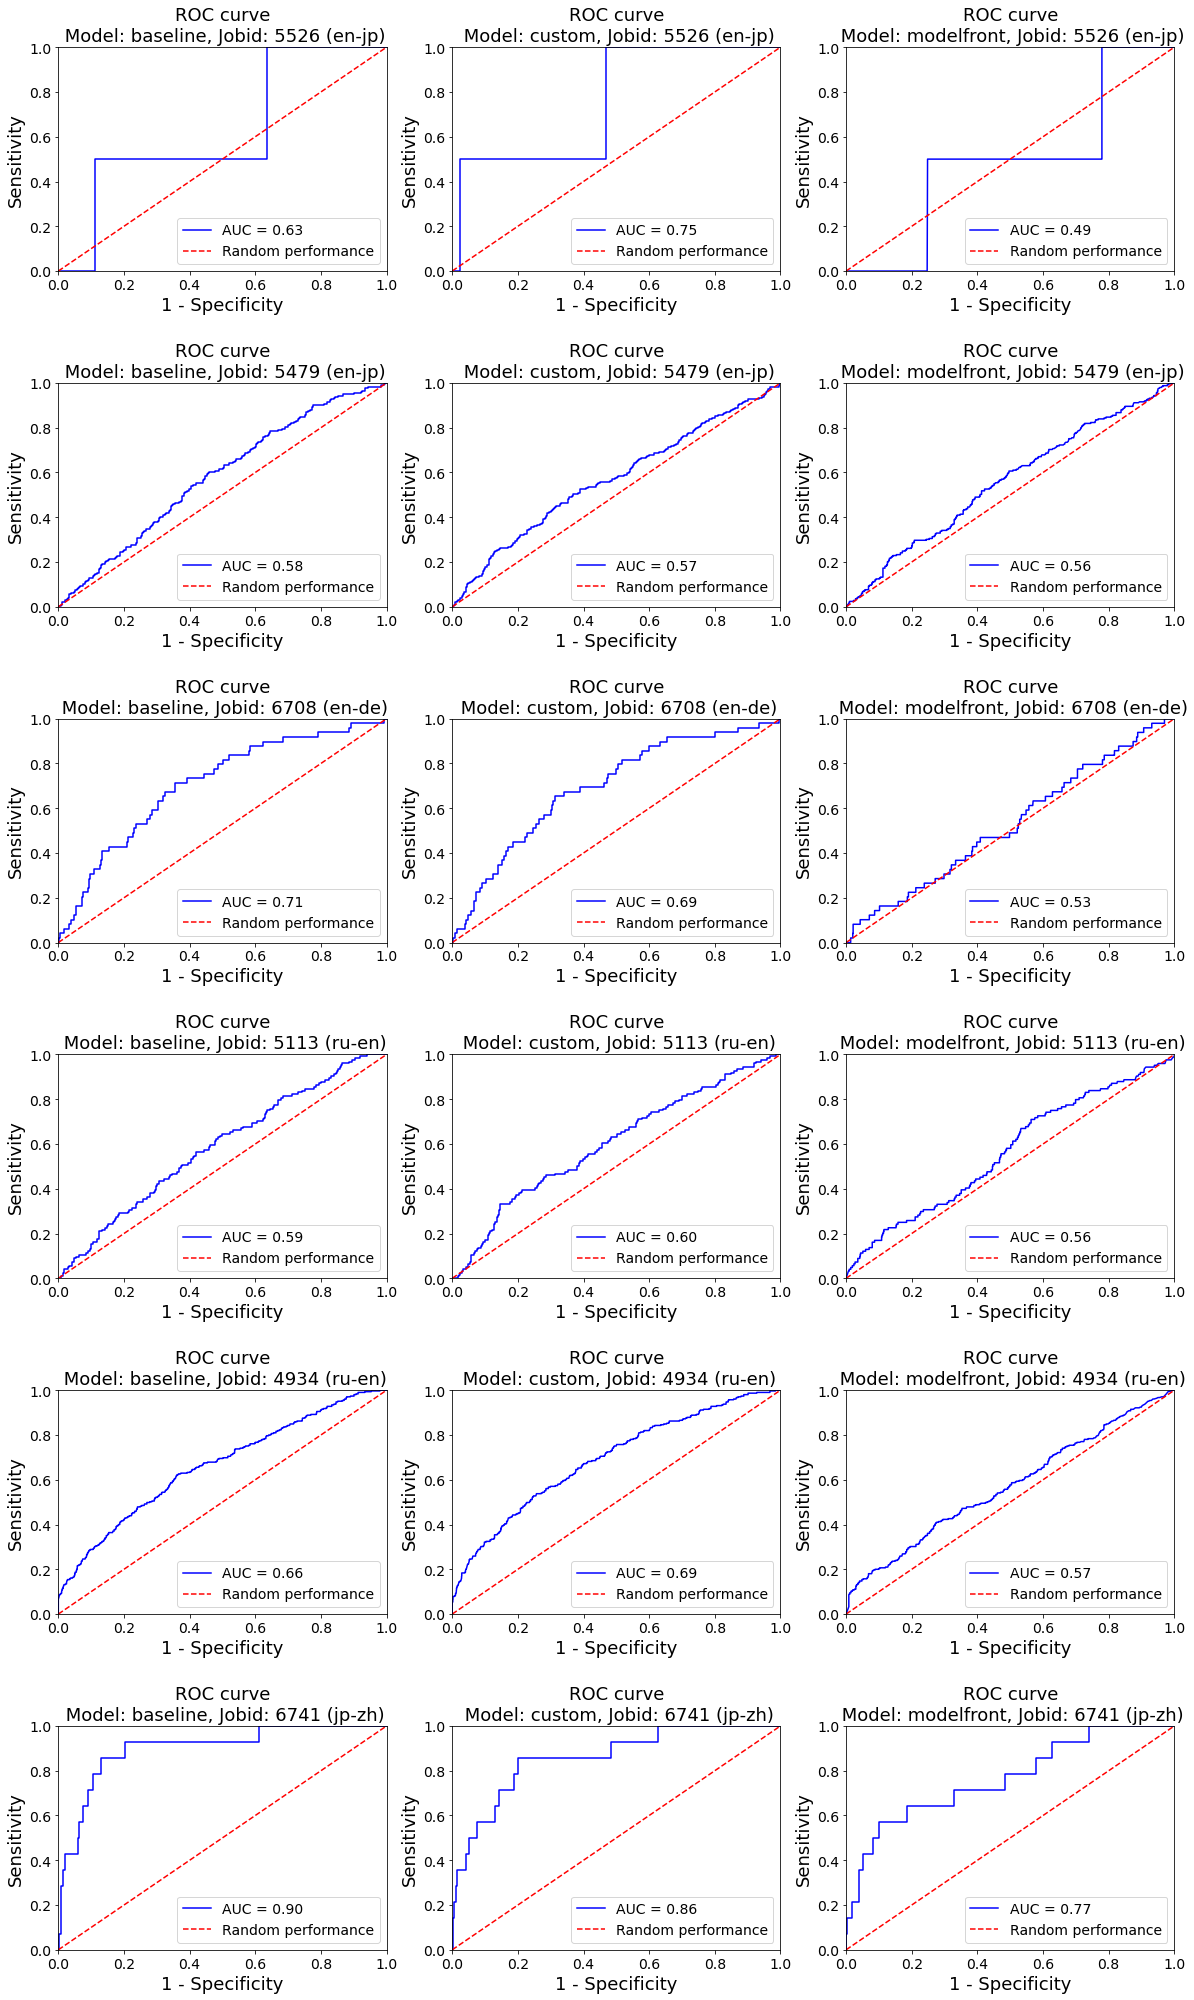

In [67]:
# plot the ROC curve for each model and job being evaluated
fig, axes = plt.subplots(
    ncols=len(df.model.unique()), nrows=len(df.jobid.unique()), figsize=(20, 35)
)
fig.subplots_adjust(hspace=0.5)

for i, model in enumerate(df.model.unique()):
    for j, jobid in enumerate(df.jobid.unique()):
        ax = axes[j][i]

        scores = df[(df.model == model) & (df.jobid == jobid)]["score"]
        y = np.array(
            [
                1 if label == True else 0
                for label in df[(df.model == model) & (df.jobid == jobid)]["accuracy"]
            ]
        )
        language_pair = df[(df.model == model) & (df.jobid == jobid)][
            "language_pair"
        ].values[0]

        fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
        auc_score = auc(fpr, tpr)

        ax.plot(fpr, tpr, "b", label=f"AUC = {auc_score:.2f}")
        ax.set_title(f"ROC curve\n Model: {model}, Jobid: {jobid} ({language_pair})")
        ax.plot([0, 1], [0, 1], "r--", label="Random performance")
        ax.legend(loc="lower right")
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_ylabel("Sensitivity")
        ax.set_xlabel("1 - Specificity")

---
**Considerations:**
  
* The 'custom' model has a better performance (0.67) compared to 'baseline' (0.62) and ModelFront (0.53).
* For all job batches, the performance of our models ('baseline' and 'custom') was superior to the performance of ModelFront.
* The performance of the 'custom' model is very close to the performance of the 'baseline', indicating that we should provide more data for the training.
---

#### 5.4.2. Precision vs Recall Curve

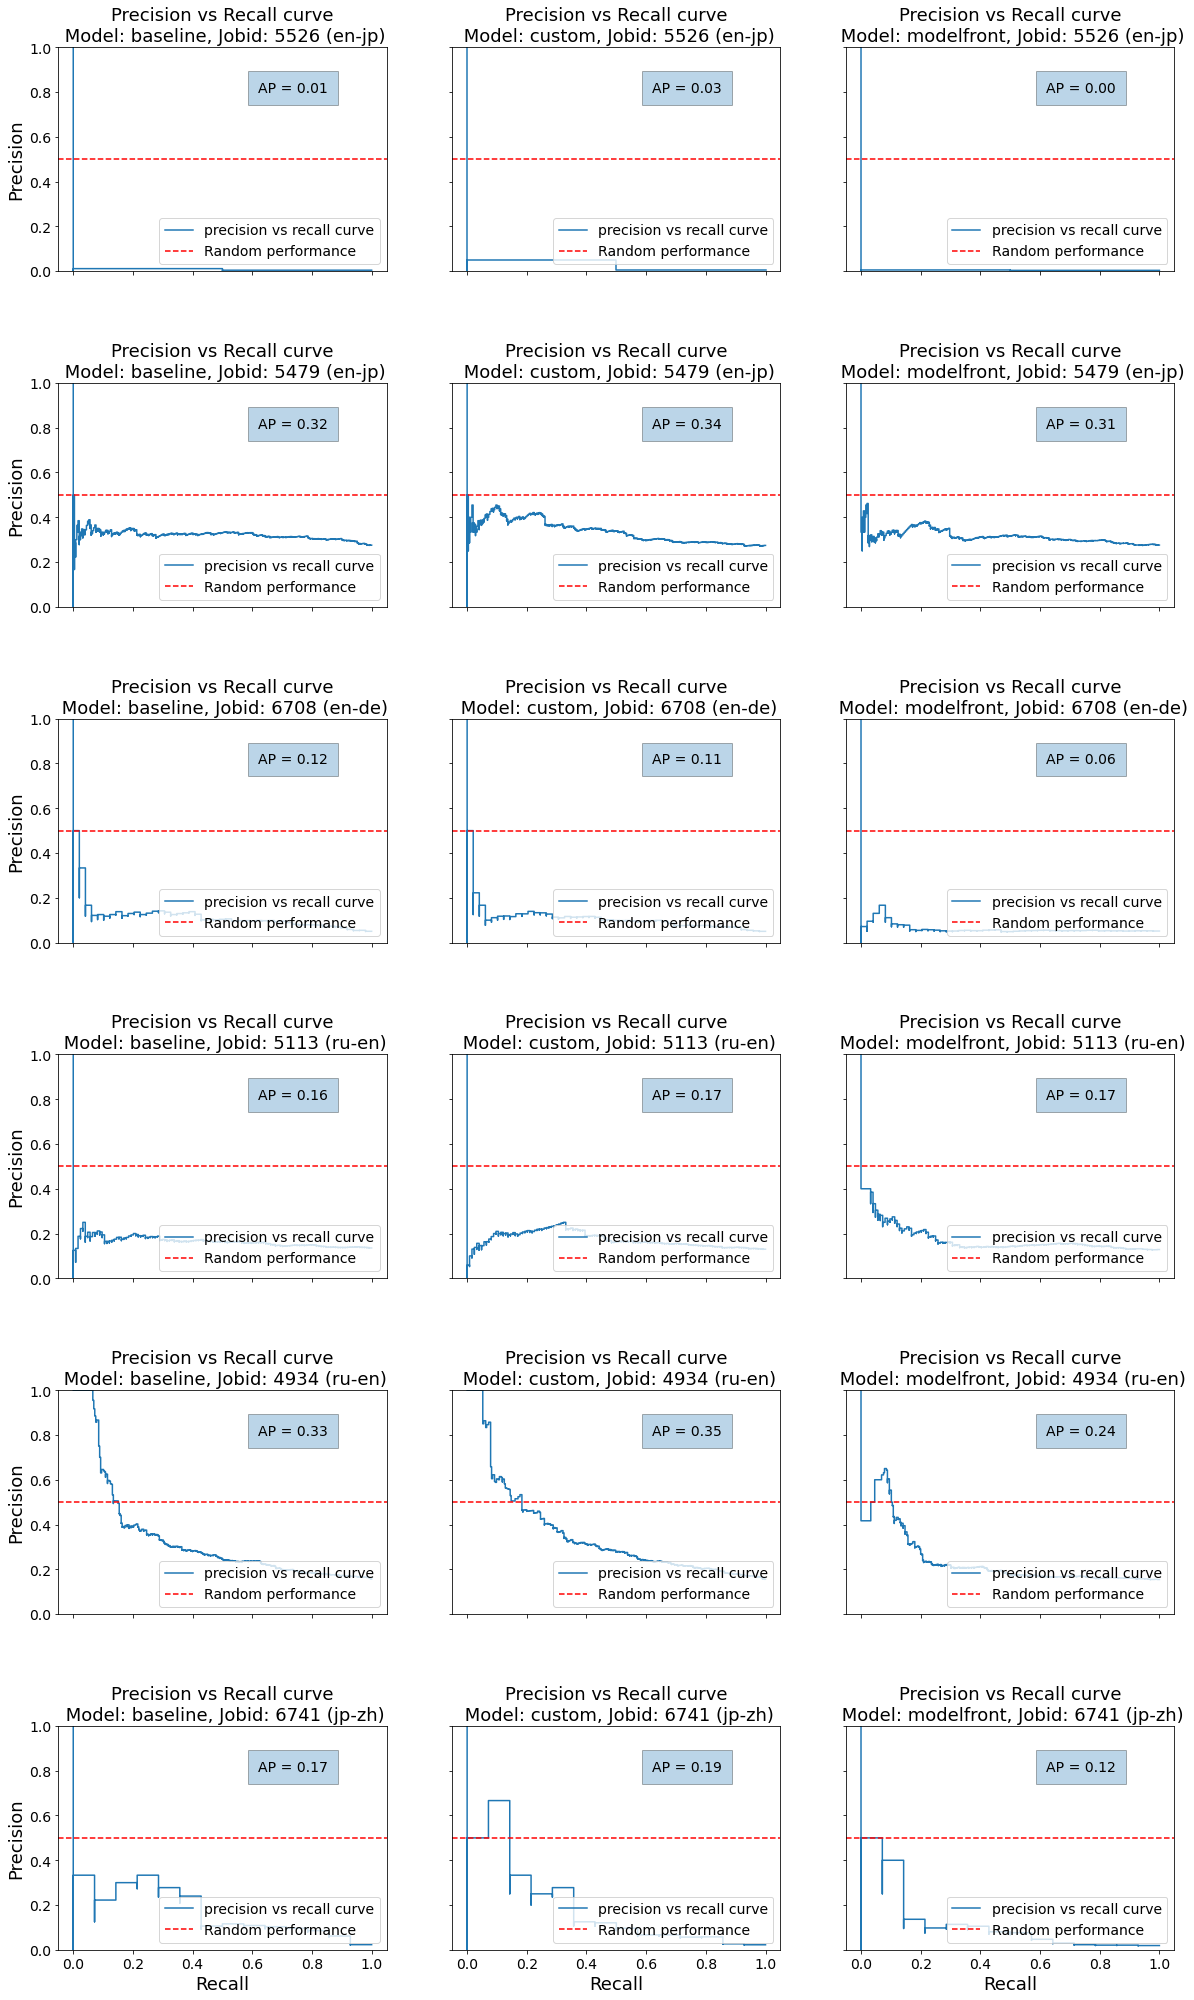

In [68]:
fig, axes = plt.subplots(
    ncols=len(df.model.unique()), nrows=len(df.jobid.unique()), figsize=(20, 35)
)
fig.subplots_adjust(hspace=0.5)

for i, model in enumerate(df.model.unique()):
    for j, jobid in enumerate(df.jobid.unique()):
        ax = axes[j][i]

        scores = df[(df.model == model) & (df.jobid == jobid)]["score"]
        y = np.array(
            [
                1 if label == True else 0
                for label in df[(df.model == model) & (df.jobid == jobid)]["accuracy"]
            ]
        )
        language_pair = df[(df.model == model) & (df.jobid == jobid)][
            "language_pair"
        ].values[0]

        precision, recall, thresholds = precision_recall_curve(y, scores, pos_label=1)
        PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=ax, label=f"precision vs recall curve")


        # measure the average precision score
        ap_score = average_precision_score(y, scores)

        ax.set_title(f"Precision vs Recall curve\n Model: {model}, Jobid: {jobid} ({language_pair})")
        ax.axhline(0.5, ls="--", color="r", label="Random performance")
        ax.text(0.62, 0.8, f'AP = {ap_score:.2f}', bbox={'alpha': 0.3, 'pad': 10})
        ax.legend(loc="lower right")

        ax.legend(loc="lower right")
        ax.set_ylim([0, 1])
        ax.label_outer()

---
**Considerations:**
  
* With the exception of job 6708 (en-de), the 'custom' model performance (measured by the Average Precision) was superior to the performances of the 'baseline' and ModelFront.

---

#### 5.4.3. Defining the optimal threshold

In [69]:
data = []

for model in df.model.unique():
    for language_pair in df.language_pair.unique():
        for jobid in df[df.language_pair == language_pair].jobid.unique():

            scores = df[
                (df.model == model)
                & (df.language_pair == language_pair)
                & (df.jobid == jobid)
            ]["score"]
            y = np.array(
                [
                    1 if label == True else 0
                    for label in df[
                        (df.model == model)
                        & (df.language_pair == language_pair)
                        & (df.jobid == jobid)
                    ]["accuracy"]
                ]
            )

            fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
            
            # we want to find the threshold which maximize the True Positive Rate with less errors as possible (False Positive Rate).
            index = np.argmax(tpr - fpr)

            # as we inverted the distribution, the 'final' threshold should also be inverted
            threshold = round(1 - thresholds[index],2)
            data.append({'model': model, 'language-pair': language_pair, 'jobid': jobid, 'threshold': threshold})
            
pd.DataFrame(data).style.set_caption('Best threshold decision for jobid')

,model,language-pair,jobid,threshold
0,baseline,en-jp,5526,0.610000
1,baseline,en-jp,5479,0.800000
2,baseline,en-de,6708,0.850000
3,baseline,ru-en,5113,0.860000
4,baseline,ru-en,4934,0.840000
5,baseline,jp-zh,6741,0.590000
6,custom,en-jp,5526,0.850000
7,custom,en-jp,5479,0.840000
8,custom,en-de,6708,0.890000
9,custom,ru-en,5113,0.800000


---
**Analysis:**
* Due to the characteristics of each model, the thresholds for 'baseline' are lower than the ones for the 'custom' model and ModelFront.
* Within a batch, we observed very distinct thresholds.
  * For example, for 'en-jp', the jobid 5526 has the best threshold of '0.62' while the 5479 of '0.8'.
  * For 'ru-en', the jobid 5113 has the best threshold of '0.86' while the 4934 has '0.84'
  * This possibly represents some problems on the jobid 5526 as it outliers from the other ones. 
* Due to the specific distribution of each batch, it is difficult to precise the correct threshold that would work for any new batch.
---

In this next block, let's compute one threshold per language pair, not per batch, and use it for the classifier metrics.

In [70]:
# keep the optimal threshold for each job
data = []
for model in df.model.unique():
    for language_pair in df.language_pair.unique():

        scores = df[(df.model == model) & (df.language_pair == language_pair)]["score"]
        y = np.array(
            [
                1 if label == True else 0
                for label in df[
                    (df.model == model) & (df.language_pair == language_pair)
                ]["accuracy"]
            ]
        )

        fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

        # we want to find the threshold which maximize the True Positive Rate with less errors as possible (False Positive Rate).
        index = np.argmax(tpr - fpr)

        # as we inverted the distribution, the 'final' threshold should also be inverted
        threshold = round(1 - thresholds[index],2)
        data.append({'model': model, 'language_pair': language_pair, 'threshold': threshold})

thresholds_df = pd.DataFrame(data)
thresholds_df.style.set_caption('Best threshold decision for language-pair')

,model,language_pair,threshold
0,baseline,en-jp,0.840000
1,baseline,en-de,0.850000
2,baseline,ru-en,0.840000
3,baseline,jp-zh,0.590000
4,custom,en-jp,0.840000
5,custom,en-de,0.890000
6,custom,ru-en,0.830000
7,custom,jp-zh,0.850000
8,modelfront,en-jp,0.990000
9,modelfront,en-de,0.840000


In [71]:
# Revert the labels and scores back to the previous values
df["accuracy"] = df.accuracy.apply(lambda accuracy: not accuracy)
df["score"] = df.score.apply(lambda score: 1 - score)

**Data Visualization**

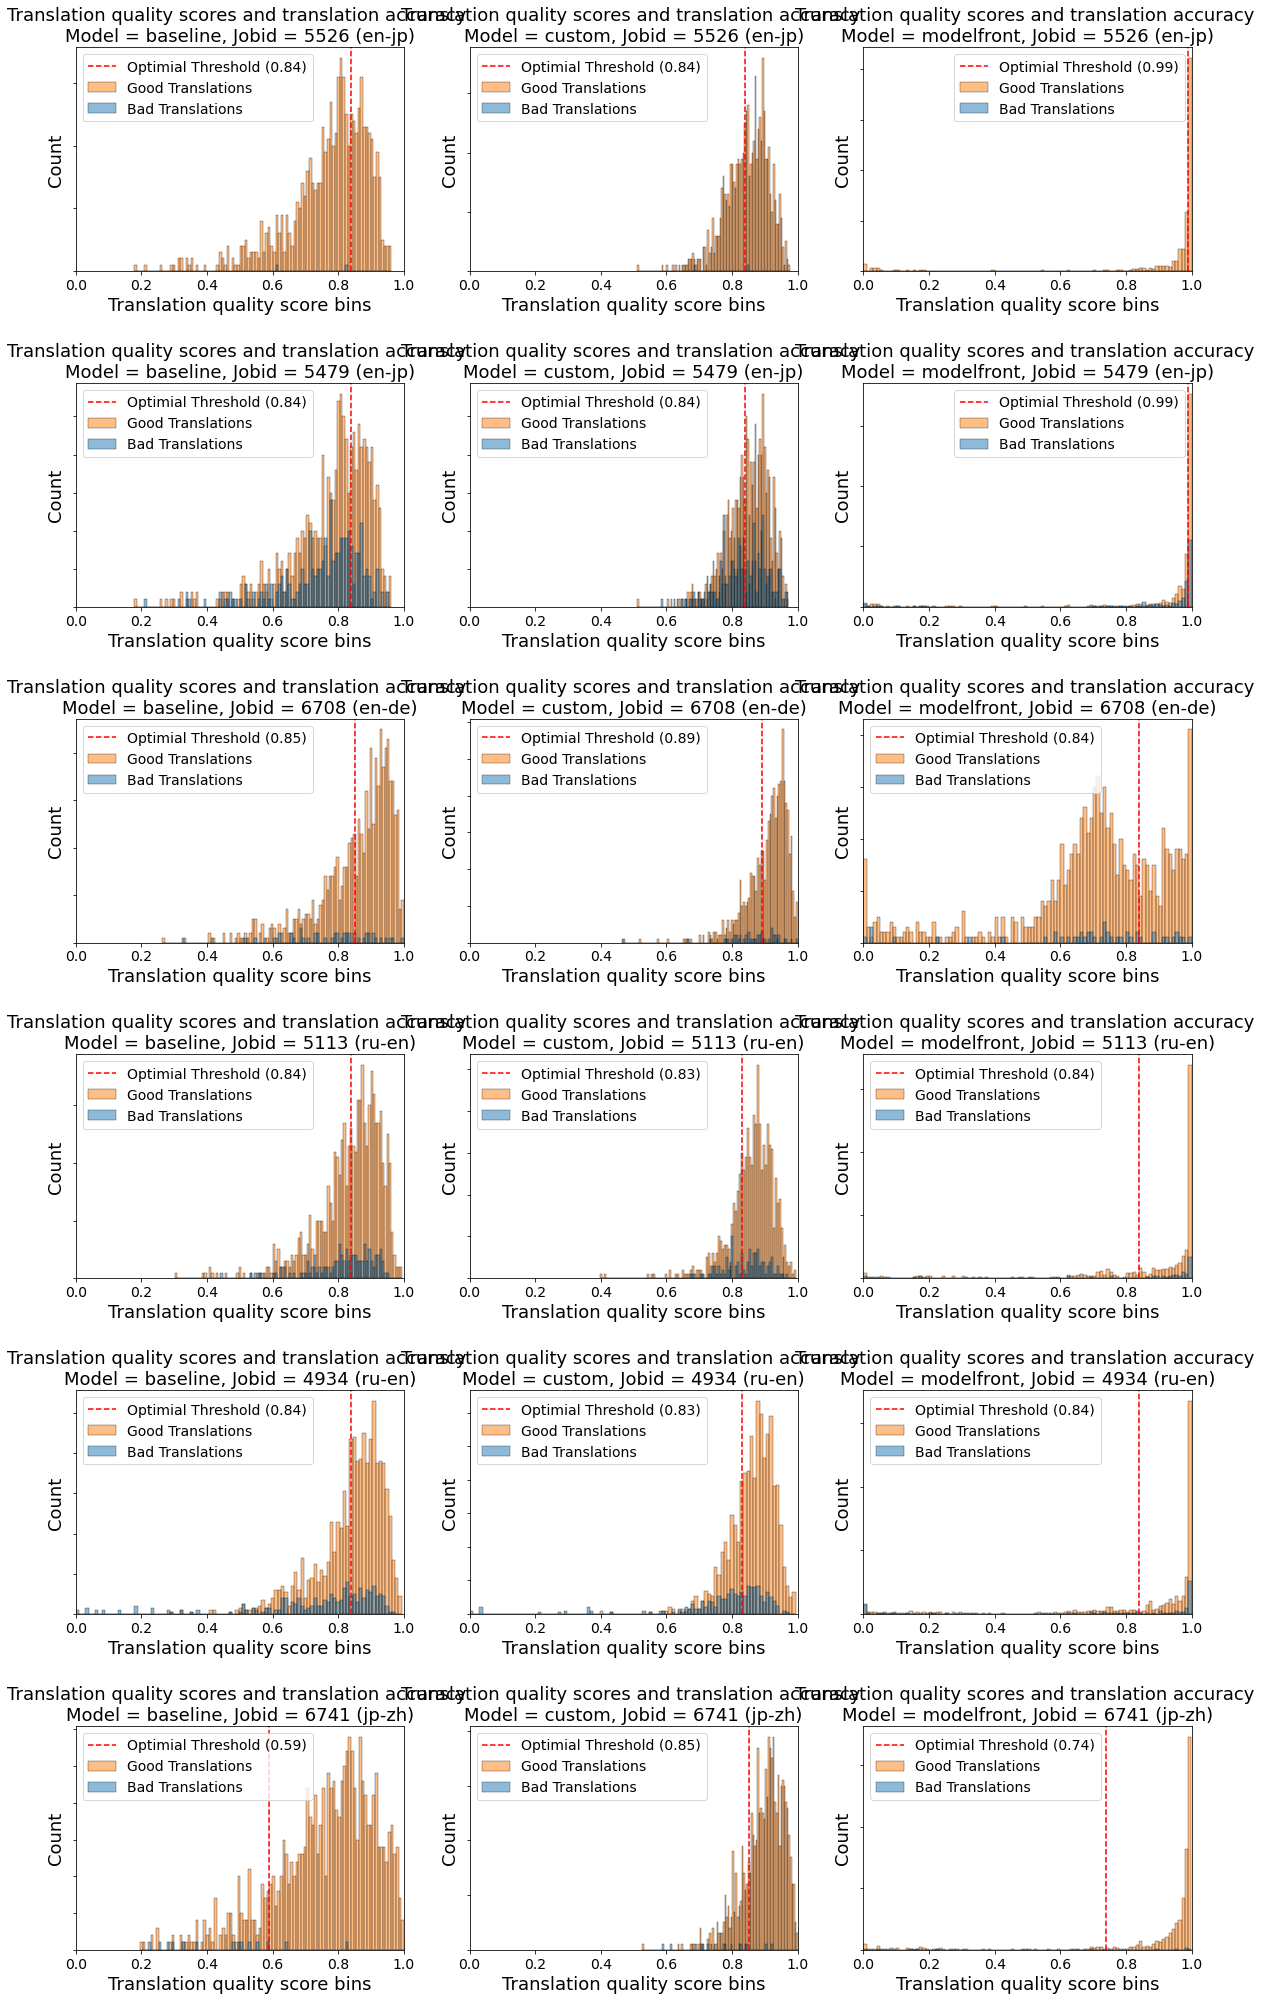

In [72]:
# Plot the density distribution of scores
fig, axes = plt.subplots(
    ncols=len(df.model.unique()), nrows=len(df.jobid.unique()), figsize=(20, 35)
)
fig.subplots_adjust(hspace=0.5)

# plot each one of the density functions
for i, model in enumerate(df.model.unique()):
    for j, jobid in enumerate(df.jobid.unique()):
        # only one model hack
        # ax = axes[j]
        ax = axes[j][i]

        slice_df = df[(df.model == model) & (df.jobid == jobid)]

        language_pair = df[(df.model == model) & (df.jobid == jobid)][
            "language_pair"
        ].values[0]

        sns.histplot(slice_df, x="score", hue="accuracy", bins=100, ax=ax)

        ax.set(
            xlabel="Translation quality score bins",
            ylabel="Count",
            title=f"Translation quality scores and translation accuracy \nModel = {model}, Jobid = {jobid} ({language_pair})",
        )
        threshold = thresholds_df[(thresholds_df.model == model) & (thresholds_df.language_pair == language_pair)].threshold.values[0]
        ax.axvline(
            threshold,
            ls="--",
            color="r",
        )
        ax.legend(
            [
                f"Optimial Threshold ({threshold:.2f})",
                "Good Translations",
                "Bad Translations",
            ]
        )

        ax.set_xlim(0, 1)
        ax.set_yticklabels([])

---
**Considerations:**
   * We observed the 'bad translation' examples distributed across the [0,1] range for the predicted quality score.
   * Due to the skewed distribution of some batches, it is difficult to locate exactly where the few 'bad translation' examples occurred.
   * The next analysis will tell us more about the data and if we are able to isolate the 'bad translations' using a classification setup.
---

#### 5.4.4. Binary Classification

In [73]:
def binary_classifier(value, threshold):
    if value > threshold:
        return True
    else:
        return False


df["prediction"] = df.apply(
    lambda row: binary_classifier(
        row["score"], 
        threshold = thresholds_df[(thresholds_df.model == row.model) & (thresholds_df.language_pair == row.language_pair)].threshold.values[0]
    ),
    axis=1,
)

**Classification Report**

In [74]:
# Let'see the performance per model
df.groupby(["model"], as_index=False).apply(
    classification_metrics
).sort_values(["model"])

model accuracy Bad Translation                                         \
                               # class # correct # incorrect Precision Recall   
0    baseline     0.59             743       503        2462      0.17   0.68   
1      custom     0.68             743       385        1757      0.18   0.52   
2  modelfront     0.61             743       349        2179      0.14   0.47   

       Good Translation                                              
    F1          # class # correct # incorrect Precision Recall   F1  
0 0.27             5925      3463         240      0.94   0.58 0.72  
1 0.27             5925      4168         358      0.92   0.70 0.80  
2 0.21             5925      3746         394      0.90   0.63 0.74

In [75]:
# Let'see the performance per job
df.groupby(["language_pair", "jobid", "model"], as_index=False).apply(
    classification_metrics
).sort_values(["language_pair", "jobid", "model"])

language_pair jobid       model accuracy Bad Translation            \
                                                    # class # correct   
0          en-de  6708    baseline     0.64              49        35   
1          en-de  6708      custom     0.69              49        30   
2          en-de  6708  modelfront     0.31              49        38   
3          en-jp  5479    baseline     0.47             249       192   
4          en-jp  5479      custom     0.58             249       129   
5          en-jp  5479  modelfront     0.54             249       141   
6          en-jp  5526    baseline     0.32               2         2   
7          en-jp  5526      custom     0.58               2         1   
8          en-jp  5526  modelfront     0.50               2         1   
9          jp-zh  6741    baseline     0.87              14        12   
10         jp-zh  6741      custom     0.79              14        12   
11         jp-zh  6741  modelfront     0.89              14         8   
12         ru-en  4934    baseline     0.62             305       192   
13         ru-en  4934      custom     0.70             305       164   
14         ru-en  4934  modelfront     0.68             305       121   
15         ru-en  5113    baseline     0.58             124        70   
16         ru-en  5113      custom     0.70             124        49   
17         ru-en  5113  modelfront     0.67             124        40   

                                     Good Translation                        \
   # incorrect Precision Recall   F1          # class # correct # incorrect   
0          339      0.09   0.71 0.17              932       593          14   
1          282      0.10   0.61 0.17              932       650          19   
2          670      0.05   0.78 0.10              932       262          11   
3          422      0.31   0.77 0.44              659       237          57   
4          257      0.33   0.52 0.41              659       402         120   
5          308      0.31   0.57 0.40              659       351         108   
6          565      0.00   1.00 0.01              834       269           0   
7          349      0.00   0.50 0.01              834       485           1   
8          415      0.00   0.50 0.00              834       419           1   
9          131      0.08   0.86 0.15              976       845           2   
10         203      0.06   0.86 0.10              976       773           2   
11          98      0.08   0.57 0.13              976       878           6   
12         650      0.23   0.63 0.33             1683      1033         113   
13         456      0.26   0.54 0.35             1683      1227         141   
14         455      0.21   0.40 0.27             1683      1228         184   
15         355      0.16   0.56 0.26              841       486          54   
16         210      0.19   0.40 0.26              841       631          75   
17         233      0.15   0.32 0.20              841       608          84   

                          
   Precision Recall   F1  
0       0.98   0.64 0.77  
1       0.97   0.70 0.81  
2       0.96   0.28 0.43  
3       0.81   0.36 0.50  
4       0.77   0.61 0.68  
5       0.76   0.53 0.63  
6       1.00   0.32 0.49  
7       1.00   0.58 0.73  
8       1.00   0.50 0.67  
9       1.00   0.87 0.93  
10      1.00   0.79 0.88  
11      0.99   0.90 0.94  
12      0.90   0.61 0.73  
13      0.90   0.73 0.80  
14      0.87   0.73 0.79  
15      0.90   0.58 0.70  
16      0.89   0.75 0.82  
17      0.88   0.72 0.79

In [76]:
# Let'see the performance per language
df.groupby(["language_pair", "model"], as_index=False).apply(
    classification_metrics
).sort_values(["language_pair", "model"])

language_pair       model accuracy Bad Translation                        \
                                              # class # correct # incorrect   
0          en-de    baseline     0.64              49        35         339   
1          en-de      custom     0.69              49        30         282   
2          en-de  modelfront     0.31              49        38         670   
3          en-jp    baseline     0.40             251       194         987   
4          en-jp      custom     0.58             251       130         606   
5          en-jp  modelfront     0.52             251       142         723   
6          jp-zh    baseline     0.87              14        12         131   
7          jp-zh      custom     0.79              14        12         203   
8          jp-zh  modelfront     0.89              14         8          98   
9          ru-en    baseline     0.60             429       262        1005   
10         ru-en      custom     0.70             429       213         666   
11         ru-en  modelfront     0.68             429       161         688   

                         Good Translation                                  \
   Precision Recall   F1          # class # correct # incorrect Precision   
0       0.09   0.71 0.17              932       593          14      0.98   
1       0.10   0.61 0.17              932       650          19      0.97   
2       0.05   0.78 0.10              932       262          11      0.96   
3       0.16   0.77 0.27             1493       506          57      0.90   
4       0.18   0.52 0.26             1493       887         121      0.88   
5       0.16   0.57 0.25             1493       770         109      0.88   
6       0.08   0.86 0.15              976       845           2      1.00   
7       0.06   0.86 0.10              976       773           2      1.00   
8       0.08   0.57 0.13              976       878           6      0.99   
9       0.21   0.61 0.31             2524      1519         167      0.90   
10      0.24   0.50 0.33             2524      1858         216      0.90   
11      0.19   0.38 0.25             2524      1836         268      0.87   

                
   Recall   F1  
0    0.64 0.77  
1    0.70 0.81  
2    0.28 0.43  
3    0.34 0.49  
4    0.59 0.71  
5    0.52 0.65  
6    0.87 0.93  
7    0.79 0.88  
8    0.90 0.94  
9    0.60 0.72  
10   0.74 0.81  
11   0.73 0.79

---
**Analysis:**

* The 'custom' model suffers from unbalanced classes and has a lower recall compared to the 'baseline' for the 'bad translation' class.
* Despite this, the 'custom' model has a high recall and precision for the majority class (good translation), resulting in the highest F1-score for that class.
* If we compare the metrics for the 'bad translation' (the class we used to optimize our threshold choice), with the exception of the 'en-de' pair, the 'baseline' has a higher recall score for this class (it gets more 'bad translations' - our optimization choice). For the 'en-de' language pair, ModelFront has a higher recall, but also the double of incorrect examples in this class (half of the precision).
* The 'baseline' model has better f1-score values for the 'bad translation' class when comparing all models.
* The 'custom' model has better f1-score values for the 'good translation' class when comparing all models.
---

## 6. Predicting batch quality

Is there any correlation with the distributions and quality scores?

In [77]:
batch_accuracy = (
    df.groupby(["language_pair", "jobid"], as_index=False)
    .accuracy.mean()
    .rename(columns={"accuracy": "batch_quality"})
)
batch_accuracy

,language_pair,jobid,batch_quality
0,en-de,6708,0.95
1,en-jp,5479,0.73
2,en-jp,5526,1.00
3,jp-zh,6741,0.99
4,ru-en,4934,0.85
5,ru-en,5113,0.87


### 6.1 Prediction using the statistics on the density distribution of quality scores

In [78]:
group_df = df.groupby(["language_pair", "jobid", "model"], as_index=False).score.agg(
    {"min": "min", "max": "max", "median": "median", "mean": "mean", "std": "std"}
)
group_df.merge(batch_accuracy, on=["language_pair", "jobid"]).sort_values(
    ["model", "language_pair", "batch_quality"]
)
# number above threshold, and below

,language_pair,jobid,model,min,max,median,mean,std,batch_quality
0,en-de,6708,baseline,0.26,1.00,0.89,0.85,0.12,0.95
3,en-jp,5479,baseline,0.18,0.96,0.80,0.77,0.13,0.73
6,en-jp,5526,baseline,0.18,0.96,0.80,0.77,0.13,1.00
9,jp-zh,6741,baseline,0.20,1.00,0.79,0.76,0.16,0.99
12,ru-en,4934,baseline,0.00,0.99,0.86,0.82,0.13,0.85
15,ru-en,5113,baseline,0.30,1.00,0.85,0.83,0.10,0.87
1,en-de,6708,custom,0.46,1.00,0.92,0.91,0.07,0.95
4,en-jp,5479,custom,0.51,0.97,0.85,0.84,0.07,0.73
7,en-jp,5526,custom,0.51,0.98,0.85,0.85,0.07,1.00
10,jp-zh,6741,custom,0.53,1.00,0.91,0.89,0.06,0.99


**Considerations:**

* We can not infer the quality of the batch directly from the mean/median/std from each model. The distribution of values is a characteristic of the probabilistic distribution of each model that has not been trained or standardized to match the accuracy of the batch. 
* We can not also compare directly the values between our models ('baseline' and 'custom') and ModelFront as the models has a different approach to distribute the probabilities. ModelFront concentrate more items as 'good quality' but also has more errors on that class.
* One possible analysis is to compare the rank order for the batches for each language pair when compared with the mean of each model.
  * For example, for the language-pair 'en-jp', we have the this ranking order sorting by the accuracy of each batch accuracy: 5526 (100%) > 5479 (73%). When comparing the batches using the score for each model, we observe a equal mean for both 'baseline': 5526 (0.77) = 5479 (0.77), and for 'modelfront': 5526 (0.91) = 5479 (0.91). For the 'custom' model we have a correlation: 5526 (0.85) > 5479 (0.84).
  * For the language-pair 'ru-en', we have the this ranking order sorting by the accuracy of each batch accuracy: 5113 (87%) > 4934 (85%). When comparing the batches using the score for each model, we observe a similar rank for both 'baseline': 5113 (0.83) > 4934 (0.82), and for 'modelfront': 5113 (0.84) > 4934 (0.83). The 'custom' model follow the same idea: 5113 (0.86) > 4934 (0.85).
* Because of the reduced size of the sample, and the highly unbalanced classes, it is not possible to take conclusions from these analyses.
* The mean, median, and standard deviation can not offer any direct inference over the batch accuracy value.
---

### 6.2 Prediction using the predicted number of 'good translations'

It request the threshold parameter which is sensitble per distribution.

In [79]:
group_df = df.groupby(["language_pair", "jobid", "model"], as_index=False).score.agg(
    {"prediction": "mean"})
group_df.merge(batch_accuracy, on=["language_pair", "jobid"]).sort_values(
    ["model", "language_pair", "batch_quality"]
)

,language_pair,jobid,model,prediction,batch_quality
0,en-de,6708,baseline,0.85,0.95
3,en-jp,5479,baseline,0.77,0.73
6,en-jp,5526,baseline,0.77,1.00
9,jp-zh,6741,baseline,0.76,0.99
12,ru-en,4934,baseline,0.82,0.85
15,ru-en,5113,baseline,0.83,0.87
1,en-de,6708,custom,0.91,0.95
4,en-jp,5479,custom,0.84,0.73
7,en-jp,5526,custom,0.85,1.00
10,jp-zh,6741,custom,0.89,0.99


---
**Considerations:**:

* Similar to the consideratinos using the density distribution statistics, we do not see a direct comparision between the % of good translations (prediction column) and the batch quality. 
* Similar to what we veriried using the density distribution statistics, one possibility is to compare the rank order for the batches for each language pair when compared with the prediction score of each model. 
* In any case, as we have a reduced size of the sample, it is not possible to reach into conclusions by these analyses.
---

## 7. Threshold decision on future batches

In the previous analysis, we observed that different translation batches can require different thresholds for a binary classification into 'good' and 'bad' translations.

In this section, we want to ilustrate and discuss what is the business impact of selecting different thesholds and how to guide future batches for this decision.

### 7.1. Bussines Impact on the definition of each threshold

**What is the cost to select the optimal threshold we defined previously?**

By cost, we want to analyse specifically the **'bad translation'** identification and understand how many translation pairs are classified as such (**#total**), and, from those, how many were correcly classified (**#correct**) and what is the recall rate for this class (**recall**). 

In [80]:
def threshold_cost(df):

    threshold = thresholds_df[(thresholds_df.model == df.model.values[0]) & (thresholds_df.language_pair == df.language_pair.values[0])].threshold.values[0]

    return pd.Series(
        [
            # bad translations - TP + FN
            str(sum(df.score <= threshold)),
            # correct - TP
            sum((df.score <= threshold) & (df.accuracy == False)),
            # % recall -  TP / TP + FN
            sum((df.score <= threshold) & (df.accuracy == False))
            / sum(df.accuracy == False),
        ],
        index=[
            [
                "Bad Translation",
                "Bad Translation",
                "Bad Translation",
            ],
            ["#total", "#correct", "recall"],
        ],
    )


df.groupby(["language_pair", "jobid", "model"], as_index=False).apply(
    threshold_cost
).sort_values(["language_pair", "jobid", "model"])

language_pair jobid       model Bad Translation                
                                            #total #correct recall
0          en-de  6708    baseline             374       35   0.71
1          en-de  6708      custom             312       30   0.61
2          en-de  6708  modelfront             708       38   0.78
3          en-jp  5479    baseline             614      192   0.77
4          en-jp  5479      custom             386      129   0.52
5          en-jp  5479  modelfront             449      141   0.57
6          en-jp  5526    baseline             567        2   1.00
7          en-jp  5526      custom             350        1   0.50
8          en-jp  5526  modelfront             416        1   0.50
9          jp-zh  6741    baseline             143       12   0.86
10         jp-zh  6741      custom             215       12   0.86
11         jp-zh  6741  modelfront             106        8   0.57
12         ru-en  4934    baseline             842      192   0.63
13         ru-en  4934      custom             620      164   0.54
14         ru-en  4934  modelfront             576      121   0.40
15         ru-en  5113    baseline             425       70   0.56
16         ru-en  5113      custom             259       49   0.40
17         ru-en  5113  modelfront             273       40   0.32

---
**Analysis:**

* With the optimal threshold per language, the results are the same as we got in the previous section.
* We observe that, in general, our models ('baseline' and 'custom') are better compared with ModelFront on identifing 'bad translations'.
* The 'custom' model suffers from class imbalance, indicating that we need more data (mainly 'bad translations') to improve the recall performance.
---

**What would be the cost if I use other thresholds?**

In the following table, we continue our analysis on the **"bad translation"** identification and show how different threshold could change the metrics we are evaluating.

In [81]:
def threshold_cost(df):

    threshold = thresholds_df[(thresholds_df.model == df.model.values[0]) & (thresholds_df.language_pair == df.language_pair.values[0])].threshold.values[0]

    series = []
    header = []
    columns = []
    # header.append(best_threshold)
    for threshold in np.arange(0, 1, 0.1):
        threshold = round(threshold, 2)
        # bad translations - TP + FN
        series.append(str(sum(df.score <= threshold)))
        # correct - TP
        series.append(sum((df.score <= threshold) & (df.accuracy == False)))
        # % recall -  TP / TP + FN
        series.append(
            sum((df.score <= threshold) & (df.accuracy == False))
            / sum(df.accuracy == False)
        )
        header += ["threshold = {}".format(threshold)] * 3
        columns += ["#total", "#correct", "recall"]
    return pd.Series(series, index=[header, columns])


df.groupby(["language_pair", "jobid", "model"], as_index=False).apply(threshold_cost).sort_values(["language_pair", "jobid", "model"])

language_pair jobid       model threshold = 0.0                  \
                                            #total #correct recall   
0          en-de  6708    baseline               0        0   0.00   
1          en-de  6708      custom               0        0   0.00   
2          en-de  6708  modelfront               0        0   0.00   
3          en-jp  5479    baseline               0        0   0.00   
4          en-jp  5479      custom               0        0   0.00   
5          en-jp  5479  modelfront               3        1   0.00   
6          en-jp  5526    baseline               0        0   0.00   
7          en-jp  5526      custom               0        0   0.00   
8          en-jp  5526  modelfront               3        0   0.00   
9          jp-zh  6741    baseline               0        0   0.00   
10         jp-zh  6741      custom               0        0   0.00   
11         jp-zh  6741  modelfront               1        0   0.00   
12         ru-en  4934    baseline               2        2   0.01   
13         ru-en  4934      custom               2        2   0.01   
14         ru-en  4934  modelfront              24       10   0.03   
15         ru-en  5113    baseline               0        0   0.00   
16         ru-en  5113      custom               0        0   0.00   
17         ru-en  5113  modelfront              10        4   0.03   

   threshold = 0.1                 threshold = 0.2                  \
            #total #correct recall          #total #correct recall   
0                0        0   0.00               0        0   0.00   
1                0        0   0.00               0        0   0.00   
2               47        5   0.10              65        5   0.10   
3                0        0   0.00               1        0   0.00   
4                0        0   0.00               0        0   0.00   
5               34       10   0.04              48       15   0.06   
6                0        0   0.00               1        0   0.00   
7                0        0   0.00               0        0   0.00   
8               37        0   0.00              53        0   0.00   
9                0        0   0.00               1        0   0.00   
10               0        0   0.00               0        0   0.00   
11              34        3   0.21              53        5   0.36   
12               9        9   0.03              15       15   0.05   
13               6        6   0.02               6        6   0.02   
14             116       45   0.15             158       49   0.16   
15               0        0   0.00               0        0   0.00   
16               0        0   0.00               0        0   0.00   
17              34        9   0.07              56       14   0.11   

   threshold = 0.3                 threshold = 0.4                  \
            #total #correct recall          #total #correct recall   
0                1        0   0.00               3        1   0.02   
1                0        0   0.00               0        0   0.00   
2               80        6   0.12              96        7   0.14   
3                6        1   0.00              19        6   0.02   
4                0        0   0.00               0        0   0.00   
5               54       18   0.07              55       18   0.07   
6                5        0   0.00              16        0   0.00   
7                0        0   0.00               0        0   0.00   
8               57        0   0.00              59        0   0.00   
9               14        4   0.29              33        6   0.43   
10               0        0   0.00               0        0   0.00   
11              66        6   0.43              71        6   0.43   
12              22       21   0.07              30       26   0.09   
13              10       10   0.03              18       16   0.05   
14             210       61   0.20             232       62   0.20   
15         

---
**Analysis:**

* Depending on the objective for the quality estimation, we may decide by choosing a different threshold cut.
* For example, if our goal is to get as many 'bad translations' as possible, we should target a higher threshold, with the penalty to have more False Positive examples (translation pairs misclassified as not accurate when they are are accurate.)
* On other example, if we want to get the top 'bad translations' only, we should target a lower threshold, as the 'concentration' of 'bad translations' will be higher.
---

## 8. Final Considerations

* We demonstrated in this notebook the evaluation metrics for three models: 'baseline', 'custom' and ModelFront.
* We showed that our models ('baseline' and 'custom') shows the best results when we measure its performance using the balanced test set.
* We showed that our models ('baseline' and 'custom') shows the best results when we measure its performance using the unbalanced test set (previous jobs).
* We proposed a 'custom' model, fine-tuned on DC data. This approach allows the collection of more data and a new training, with the objective of improving performance. This is not possible with the 'baseline' model and ModelFront.
* We also discussed some considerations about the confidence of the predicions and the need to carefuly decide a good threshold for a binary classification taking into account the application of the measure.